In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

## Data Preprocessing

In [2]:
df = pd.read_csv("Amrita-University-English-pageview.csv")
print(df.columns)
print(df.head())

Index(['Date', 'Amrita Vishwa Vidyapeetham'], dtype='object')
         Date  Amrita Vishwa Vidyapeetham
0  2015-07-01                         165
1  2015-07-02                         203
2  2015-07-03                         131
3  2015-07-04                         103
4  2015-07-05                         112


In [3]:
df.dtypes

Date                          object
Amrita Vishwa Vidyapeetham     int64
dtype: object

In [4]:
print("Dtype:", df['Date'].dtypes)
df['Date'] = pd.to_datetime(df['Date'])
print("Dtype now:", df['Date'].dtypes)

Dtype: object
Dtype now: datetime64[ns]


In [5]:
df.columns= ['Date', 'English']
df.index = df['Date']
df = df[['English']]

In [6]:
df2 = pd.read_csv("Amrita-University-Tamil-pageview.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2.columns= ['Date', 'Tamil']
df2.index = df2['Date']
df2 = df2[['Tamil']]

In [7]:
df.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
               '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
               '2022-11-30', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=2711, freq=None)

In [8]:
df.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')
df2.index = pd.date_range(start = '1/July/2015', end = '1/Dec/2022', freq='D')

In [9]:
df = pd.concat([df,df2], axis=1)

In [10]:
df.columns

Index(['English', 'Tamil'], dtype='object')

In [11]:
df.shape

(2711, 2)

In [12]:
print(df.isna().sum())
df.fillna(0, inplace=True)

English    0
Tamil      0
dtype: int64


<AxesSubplot:>

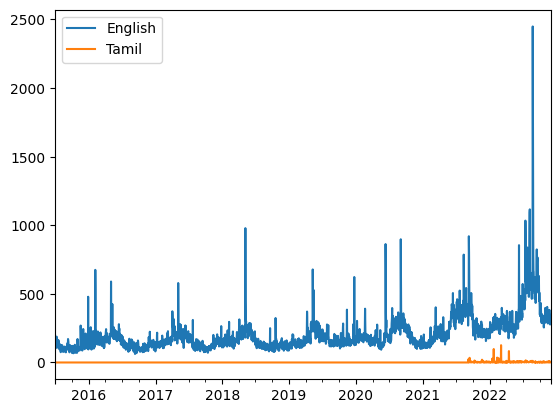

In [13]:
df.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x20d108d6e30>,
 'caps': [<matplotlib.lines.Line2D at 0x20d108d73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d108d6b60>],
 'medians': [<matplotlib.lines.Line2D at 0x20d108d7970>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d108d7c40>],
 'means': []}

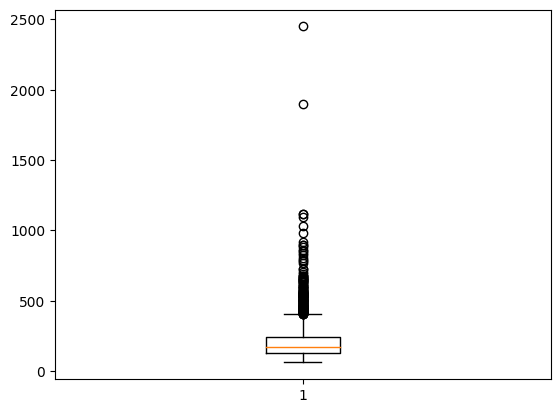

In [14]:
plt.boxplot(df['English'])

In [15]:
df['English'].describe()

count    2711.000000
mean      205.466986
std       130.425224
min        62.000000
25%       130.000000
50%       169.000000
75%       240.000000
max      2449.000000
Name: English, dtype: float64

## Exploring Time Series Data

In [16]:
print(df.head(5))
print(df.tail(5))

            English  Tamil
2015-07-01      165      0
2015-07-02      203      0
2015-07-03      131      0
2015-07-04      103      0
2015-07-05      112      0
            English  Tamil
2022-11-27      277      3
2022-11-28      321      3
2022-11-29      319      2
2022-11-30      330      3
2022-12-01      333      4


In [17]:
print("No of Rows:", len(df))
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

No of Rows: 2711
Start Date: 2015-07-01 00:00:00
End Date: 2022-12-01 00:00:00


In [18]:
print(df['01-2022'])

            English  Tamil
2022-01-01      177      2
2022-01-02      243      0
2022-01-03      295      4
2022-01-04      269      2
2022-01-05      254      2
2022-01-06      241      0
2022-01-07      242      2
2022-01-08      234      2
2022-01-09      218      4
2022-01-10      272      5
2022-01-11      274      3
2022-01-12      249      2
2022-01-13      262      5
2022-01-14      232      7
2022-01-15      221     28
2022-01-16      255      1
2022-01-17      273      3
2022-01-18      292      3
2022-01-19      293      1
2022-01-20      287      3
2022-01-21      326      4
2022-01-22      265      2
2022-01-23      299     98
2022-01-24      333      3
2022-01-25      288      3
2022-01-26      236      3
2022-01-27      285      2
2022-01-28      319      6
2022-01-29      333      5
2022-01-30      290      0
2022-01-31      354      6


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\3676524725.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['01-2022'])


<AxesSubplot:>

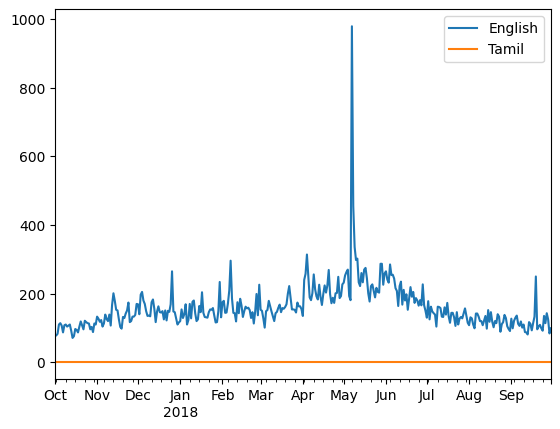

In [19]:
df['Oct-2017':'Sep-2018'].plot()

In [20]:
df.loc[:, ('English')]

2015-07-01    165
2015-07-02    203
2015-07-03    131
2015-07-04    103
2015-07-05    112
             ... 
2022-11-27    277
2022-11-28    321
2022-11-29    319
2022-11-30    330
2022-12-01    333
Freq: D, Name: English, Length: 2711, dtype: int64

<AxesSubplot:>

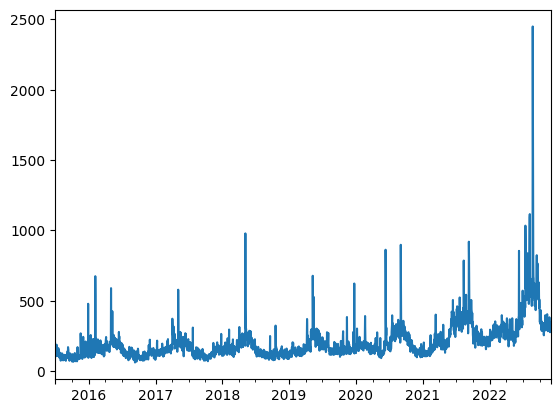

In [21]:
df.loc[:, ('English')].plot()

## DateTime Features

In [22]:
tsdf = df[['English']].copy()
print("TSDF Dtypes:", tsdf.dtypes)
tsdf['month'] = [tsdf.index[i].month for i in range(len(tsdf))]
tsdf['day'] = [tsdf.index[i].day for i in range(len(tsdf))]
print("Columns:", tsdf.columns)
print(tsdf.head())

TSDF Dtypes: English    int64
dtype: object
Columns: Index(['English', 'month', 'day'], dtype='object')
            English  month  day
2015-07-01      165      7    1
2015-07-02      203      7    2
2015-07-03      131      7    3
2015-07-04      103      7    4
2015-07-05      112      7    5


          English
month            
1      163.755760
2      182.171717
3      185.728111
4      204.971429
5      232.414747
6      254.395238
7      243.657258
8      255.733871
9      239.033333
10     170.495968
11     172.262500
12     153.068807


<AxesSubplot:xlabel='month'>

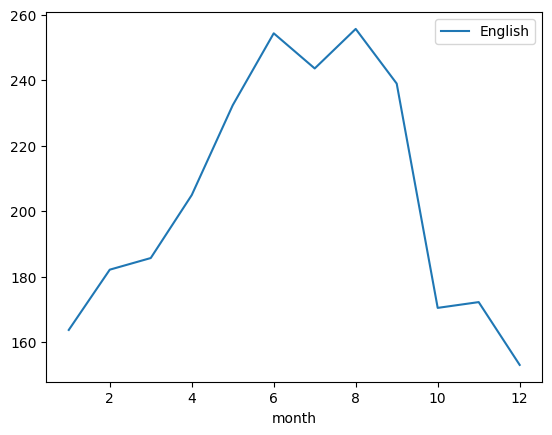

In [23]:
print(tsdf[['month','English']].groupby(['month']).mean())
tsdf[['month','English']].groupby(['month']).mean().plot()

       English
month         
1          354
2          675
3          402
4          376
5          979
6          863
7         1034
8         2449
9          920
10         433
11         405
12         623


<AxesSubplot:xlabel='month'>

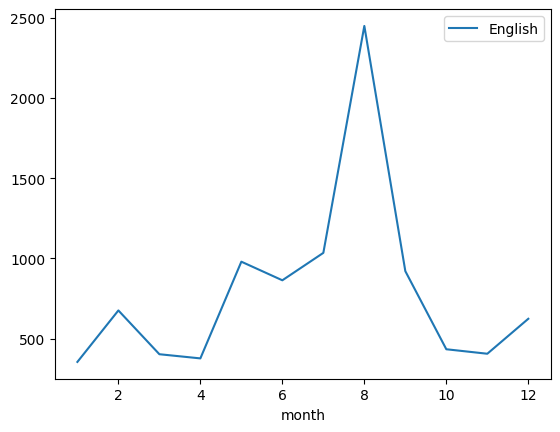

In [24]:
print(tsdf[['month','English']].groupby(['month']).max())
tsdf[['month','English']].groupby(['month']).max().plot()

      English
0  213.253230
1  210.457364
2  216.912371
3  213.474227
4  210.467700
5  190.842377
6  182.811370


<AxesSubplot:>

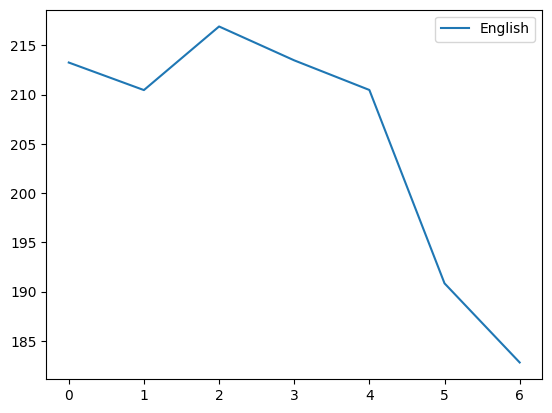

In [25]:
print(tsdf[['English']].groupby(tsdf.index.day_of_week).mean())
tsdf[['English']].groupby(tsdf.index.day_of_week).mean().plot()

            English  Tamil  EnglishS1  TamilS1
2015-07-01      165      0        NaN      NaN
2015-07-02      203      0      165.0      0.0
2015-07-03      131      0      203.0      0.0
2015-07-04      103      0      131.0      0.0
2015-07-05      112      0      103.0      0.0


<AxesSubplot:>

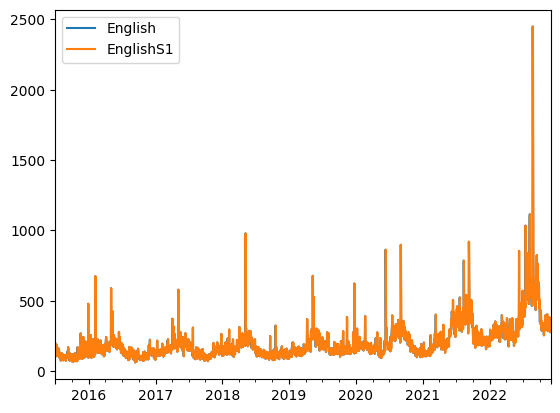

In [26]:
tsd = df[['English', 'Tamil']].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'})], axis=1)
print(tsd.head())
tsd[['English', 'EnglishS1']].plot()

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\800473452.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tsd[['English', 'EnglishS1']]['Jan-2020'].plot()


<AxesSubplot:>

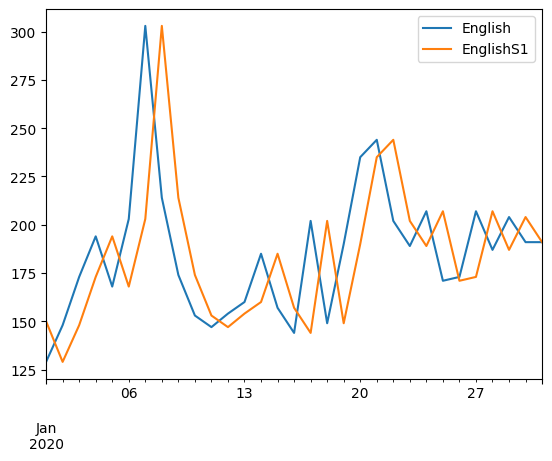

In [27]:
tsd[['English', 'EnglishS1']]['Jan-2020'].plot()

In [28]:
tsd = df[['English', 'Tamil']].copy()
tsd = pd.concat([tsd, tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'}), tsd.shift(2).rename(columns={'English':'EnglishS2', 'Tamil':'TamilS2'}), tsd.shift(3).rename(columns={'English':'EnglishS3', 'Tamil':'TamilS3'})], axis=1)
print(tsd.head(7))

            English  Tamil  EnglishS1  TamilS1  EnglishS2  TamilS2  EnglishS3  \
2015-07-01      165      0        NaN      NaN        NaN      NaN        NaN   
2015-07-02      203      0      165.0      0.0        NaN      NaN        NaN   
2015-07-03      131      0      203.0      0.0      165.0      0.0        NaN   
2015-07-04      103      0      131.0      0.0      203.0      0.0      165.0   
2015-07-05      112      0      103.0      0.0      131.0      0.0      203.0   
2015-07-06      132      0      112.0      0.0      103.0      0.0      131.0   
2015-07-07      174      0      132.0      0.0      112.0      0.0      103.0   

            TamilS3  
2015-07-01      NaN  
2015-07-02      NaN  
2015-07-03      NaN  
2015-07-04      0.0  
2015-07-05      0.0  
2015-07-06      0.0  
2015-07-07      0.0  


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\3619442405.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  tsd[['English', 'EnglishS1', 'EnglishS2', 'EnglishS3']]['Dec-2020'].plot()


<AxesSubplot:>

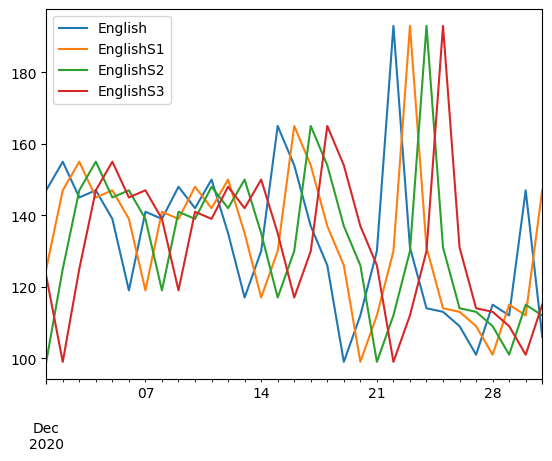

In [29]:
tsd[['English', 'EnglishS1', 'EnglishS2', 'EnglishS3']]['Dec-2020'].plot()

In [30]:
tsd = df[['English']].copy()

dfts = pd.concat([tsd, tsd.rolling(window=3).mean().rename(columns={'English':'EnglishR3Mean'}), tsd.rolling(window=3).min().rename(columns={'English':'EnglishR3Min'}), tsd.rolling(window=3).max().rename(columns={'English':'EnglishR3max'})], axis=1)
print(dfts.head(5))

            English  EnglishR3Mean  EnglishR3Min  EnglishR3max
2015-07-01      165            NaN           NaN           NaN
2015-07-02      203            NaN           NaN           NaN
2015-07-03      131     166.333333         131.0         203.0
2015-07-04      103     145.666667         103.0         203.0
2015-07-05      112     115.333333         103.0         131.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\23665924.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Aug-2020'].plot()


<AxesSubplot:>

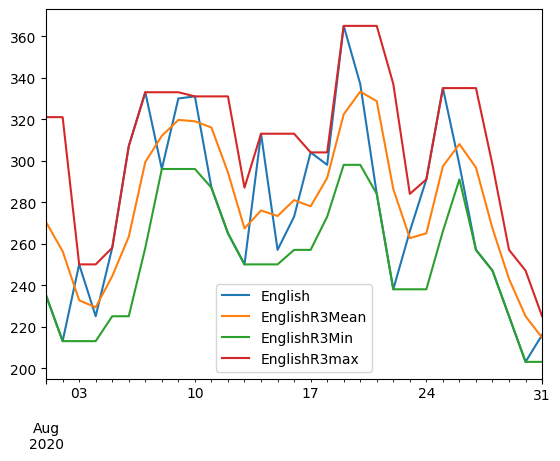

In [31]:
dfts['Aug-2020'].plot()

            English  EnglishS1  EnglishS1R2
2015-07-01      165        NaN          NaN
2015-07-02      203      165.0          NaN
2015-07-03      131      203.0        184.0
2015-07-04      103      131.0        167.0
2015-07-05      112      103.0        117.0
2015-07-06      132      112.0        107.5
2015-07-07      174      132.0        122.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\868449294.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Dec-2020'].plot()


<AxesSubplot:>

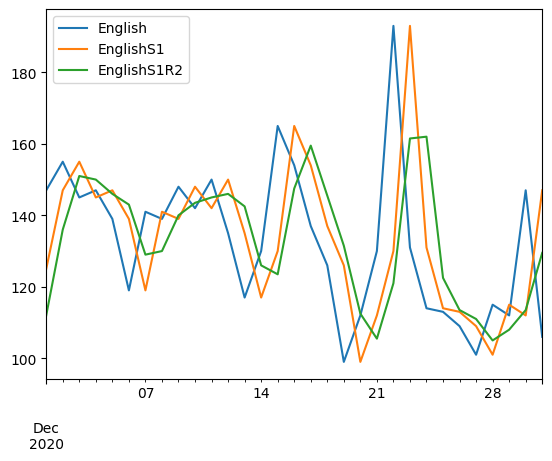

In [32]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(1).rename(columns={'English':'EnglishS1', 'Tamil':'TamilS1'})
window = tsdsh.rolling(window=2).mean().rename(columns={'EnglishS1':'EnglishS1R2', 'TamilS1':'TamilS1R2'})
dfts = pd.concat([tsd, tsdsh, window], axis=1)
print(dfts.head(7))
dfts['Dec-2020'].plot()

            English  EnglishS2R3Mean  EnglishS2R3Min  EnglishS2R3max
2015-07-01      165              NaN             NaN             NaN
2015-07-02      203              NaN             NaN             NaN
2015-07-03      131              NaN             NaN             NaN
2015-07-04      103              NaN             NaN             NaN
2015-07-05      112       166.333333           131.0           203.0


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_22320\64620575.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dfts['Dec-2020'].plot()


<AxesSubplot:>

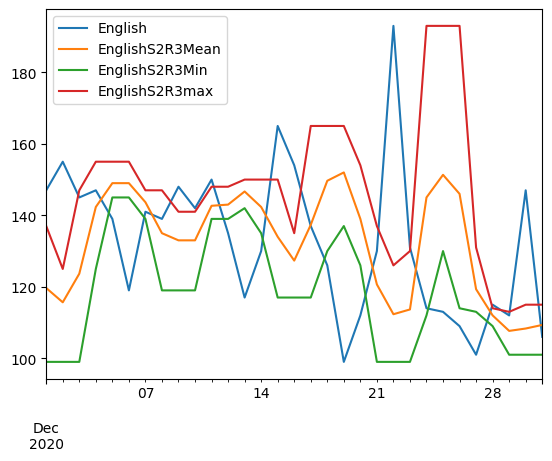

In [33]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(2).rename(columns={'English':'EnglishS2'})

dfts = pd.concat([tsd, tsdsh.rolling(window=3).mean().rename(columns={'EnglishS2':'EnglishS2R3Mean'}), tsdsh.rolling(window=3).min().rename(columns={'EnglishS2':'EnglishS2R3Min'}), tsdsh.rolling(window=3).max().rename(columns={'EnglishS2':'EnglishS2R3max'})], axis=1)
print(dfts.head(5))
dfts['Dec-2020'].plot()

            English  EnglishS1ExMean
2015-07-01      165              NaN
2015-07-02      203       165.000000
2015-07-03      131       184.000000
2015-07-04      103       166.333333
2015-07-05      112       150.500000


<AxesSubplot:>

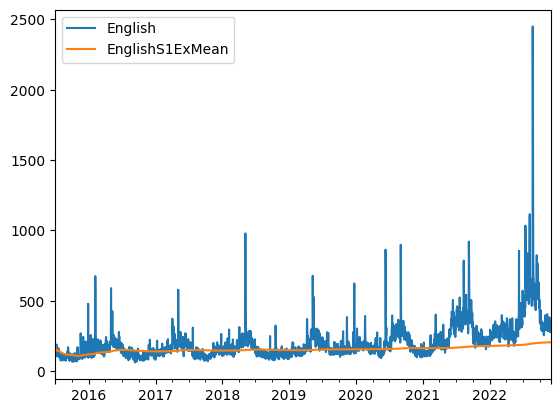

In [34]:
tsd = df[['English']].copy()
tsdsh = tsd.shift(1).rename(columns={'English':'EnglishS1'})

dfts = pd.concat([tsd, tsdsh.expanding().mean().rename(columns={'EnglishS1':'EnglishS1ExMean'})], axis=1)
print(dfts.head(5))
dfts.plot()

## Visualisation

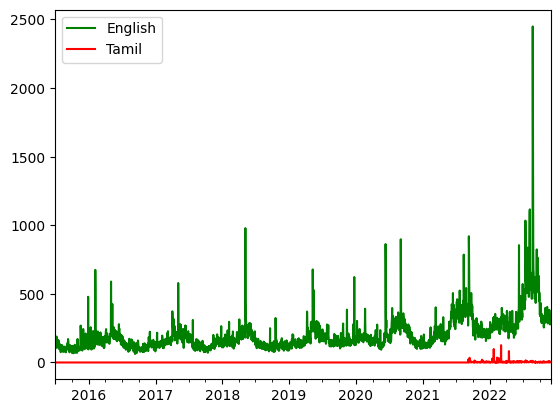

In [35]:
tsd = df[['English', 'Tamil']].copy()
tsd.plot( color=['green', 'red'])
plt.show()

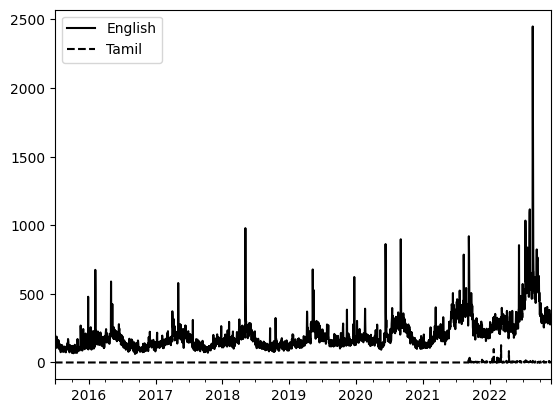

In [36]:
tsd.plot(style=['k-','k--'])
plt.show()


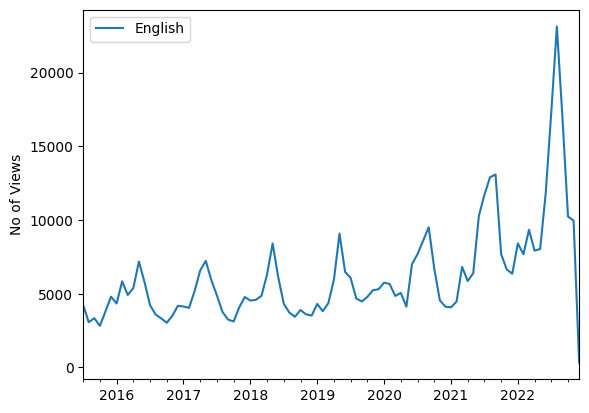

In [37]:
tsd[['English']].resample('M').sum().plot()
plt.ylabel("No of Views")
plt.show()


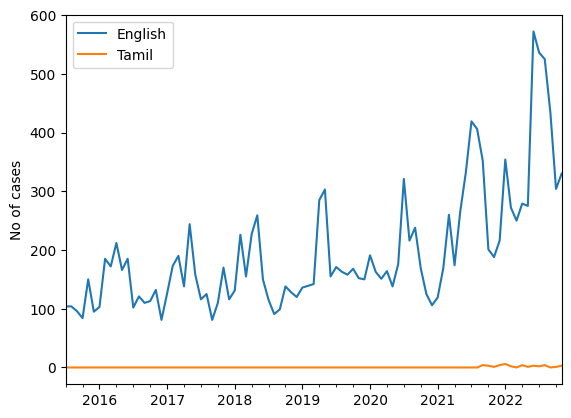

In [38]:
tsd.asfreq('M').plot()
plt.ylabel("No of cases")
plt.show()


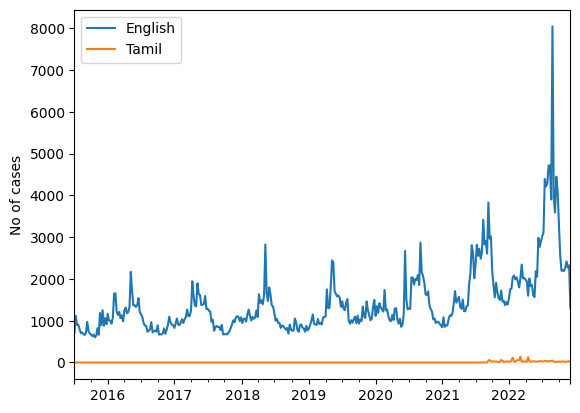

In [39]:
tsd.resample('W').sum().plot()
plt.ylabel("No of cases")
plt.show()


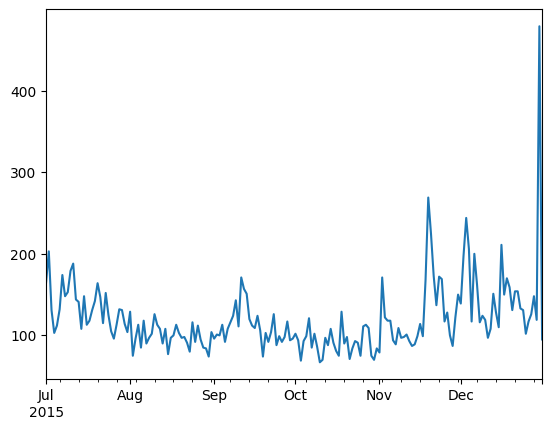

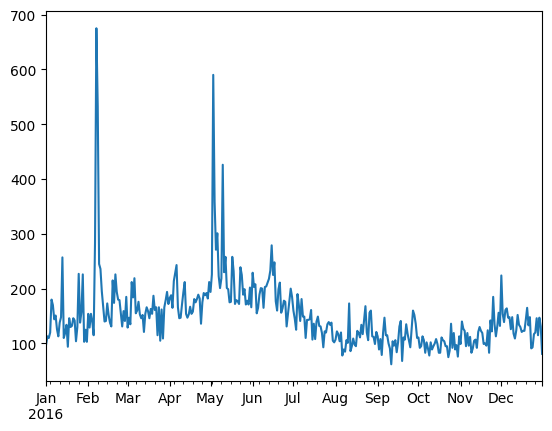

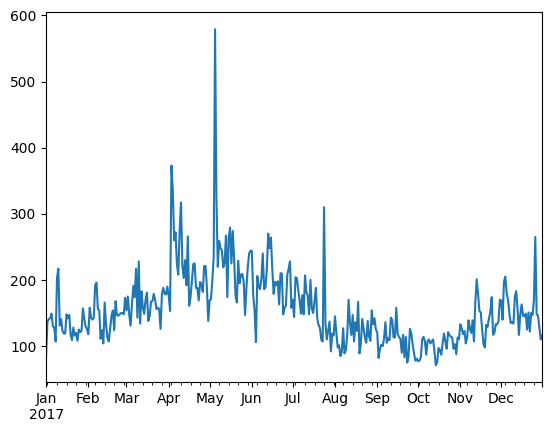

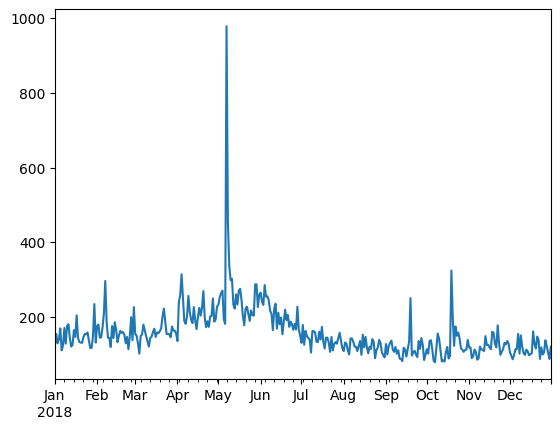

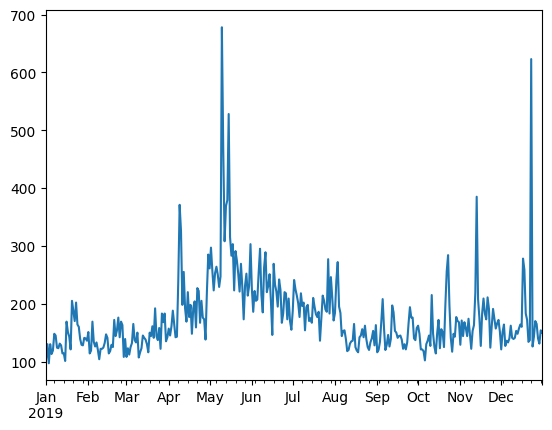

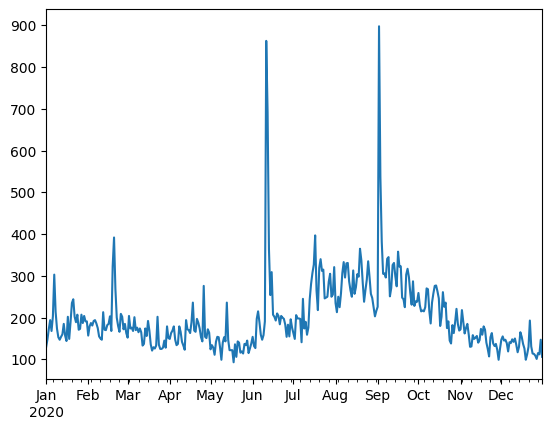

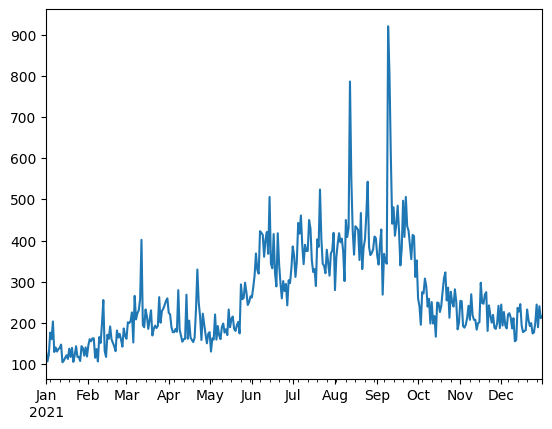

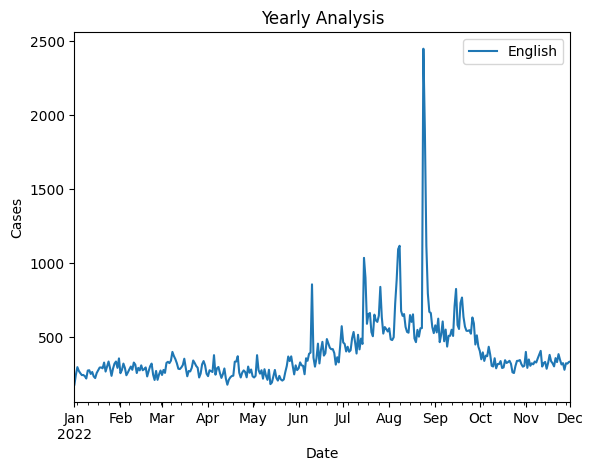

In [40]:

groups = tsd[['English']].groupby(by=[tsd.index.year], sort = True)
groups.plot(subplots=True, legend=False)
plt.title("Yearly Analysis")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.legend()
   

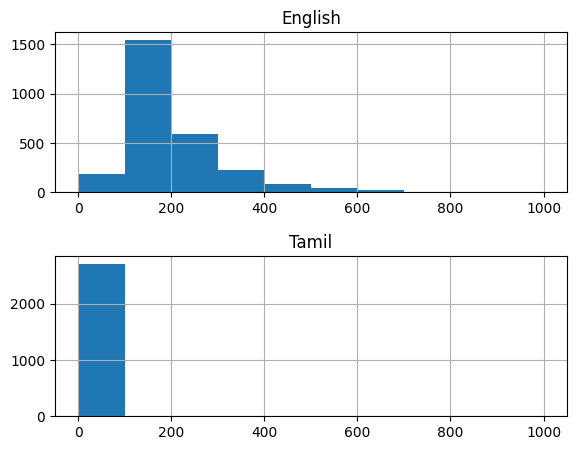

In [41]:
plt.subplot(2,1,1)
tsd['English'].hist(range=[0,1000])
plt.title("English")
plt.subplot(2,1,2)
tsd['Tamil'].hist(range=[0,1000])
plt.title("Tamil")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20d13335390>,
 'caps': [<matplotlib.lines.Line2D at 0x20d13334250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d133377f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20d13337610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d13334310>],
 'means': []}

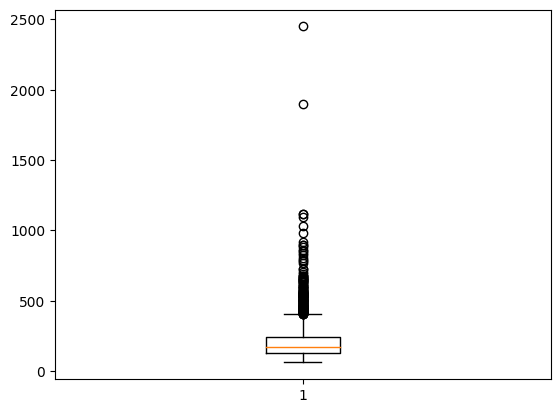

In [42]:
plt.boxplot(tsd['English'])

In [43]:
print(df['English'].describe())
print("Q 99%: ", tsd['English'].quantile(0.99))

count    2711.000000
mean      205.466986
std       130.425224
min        62.000000
25%       130.000000
50%       169.000000
75%       240.000000
max      2449.000000
Name: English, dtype: float64
Q 99%:  661.0


In [44]:
tsd['English'][tsd['English'] > 1500]

2022-08-24    2449
2022-08-25    1899
Freq: D, Name: English, dtype: int64

Outlier on 24, 25th August 2024
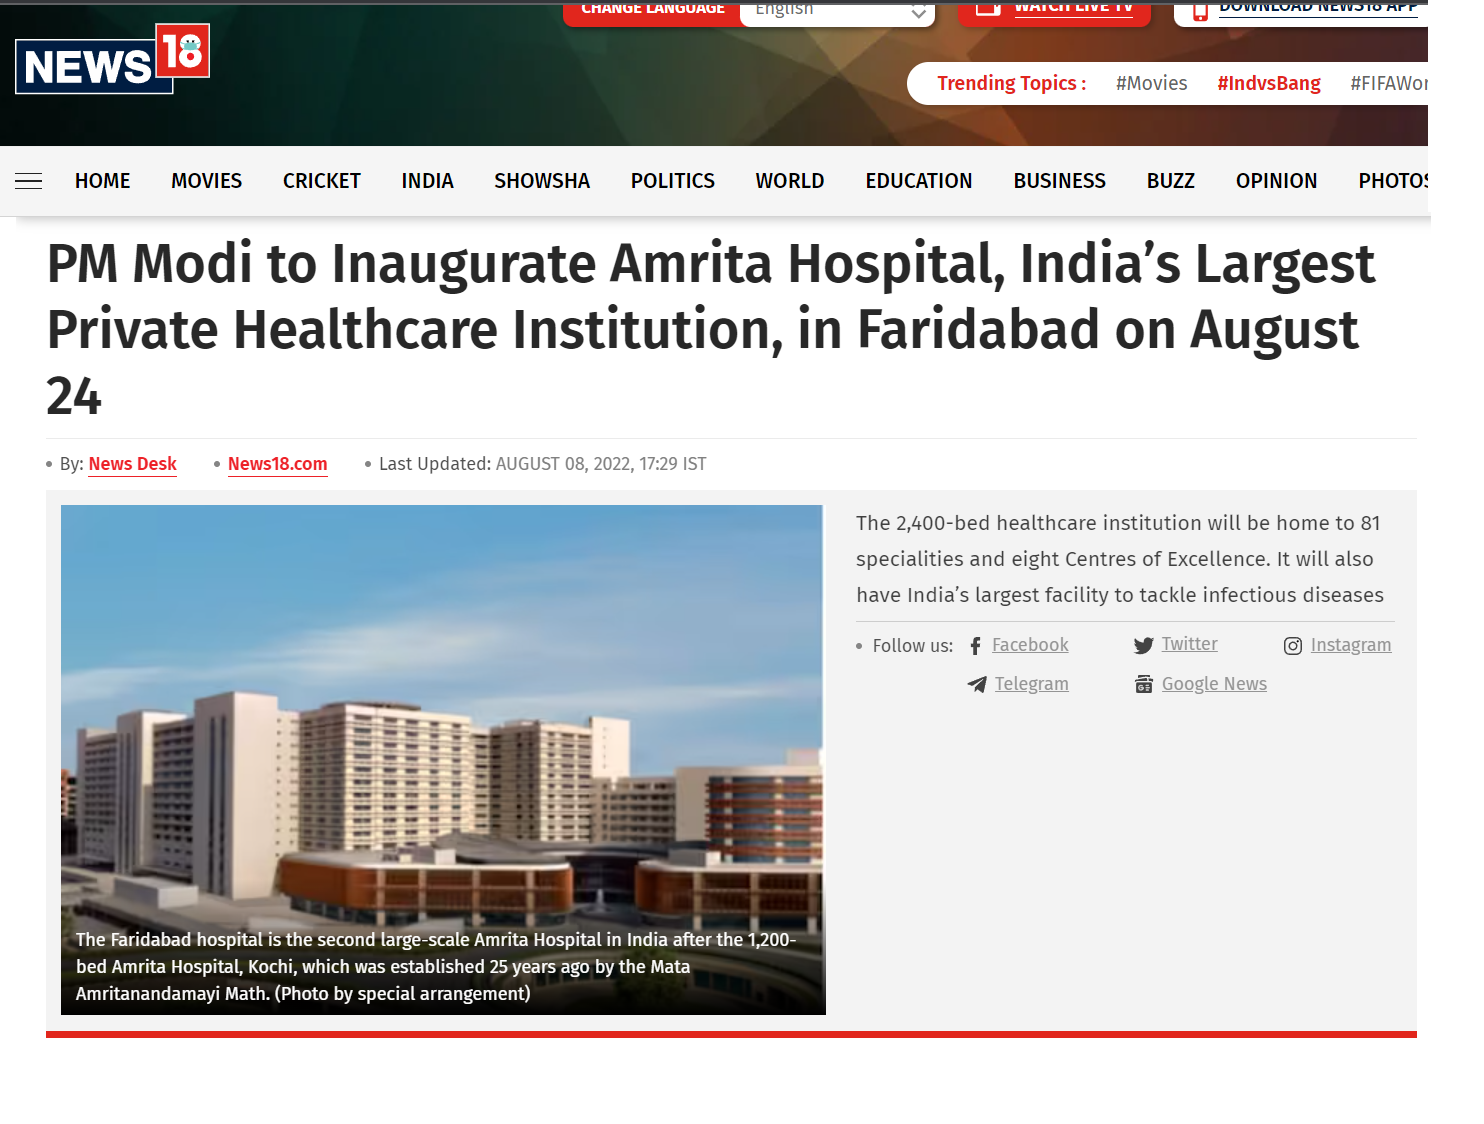

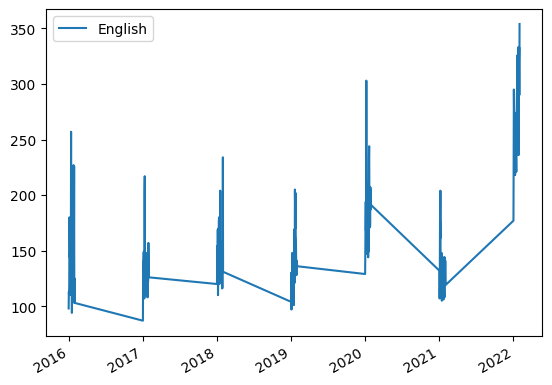

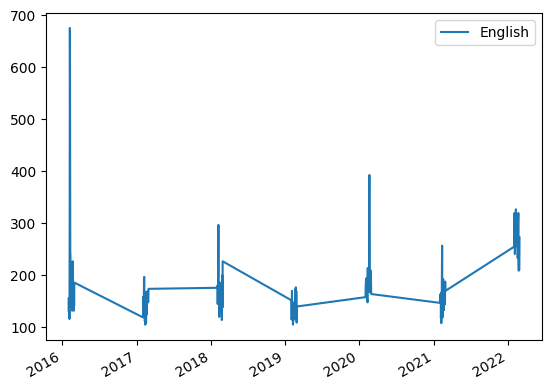

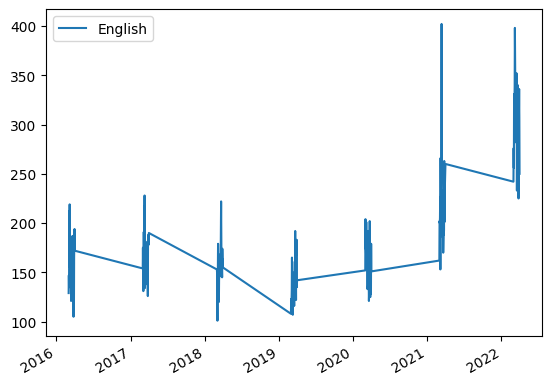

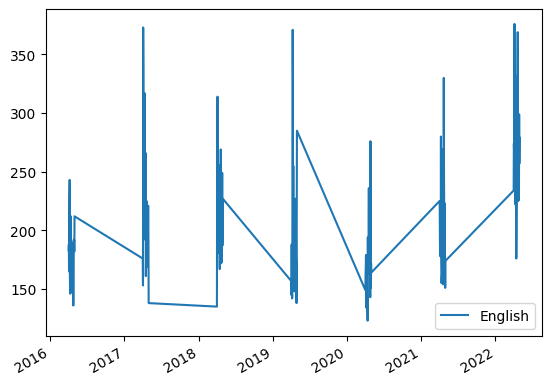

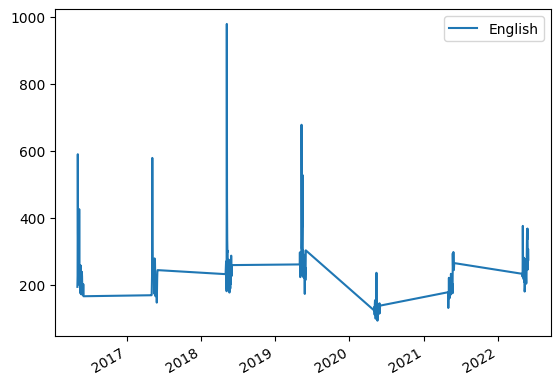

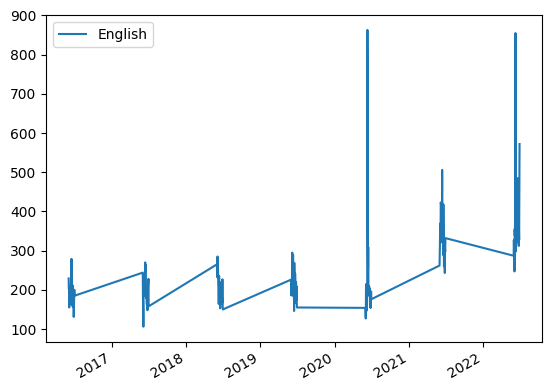

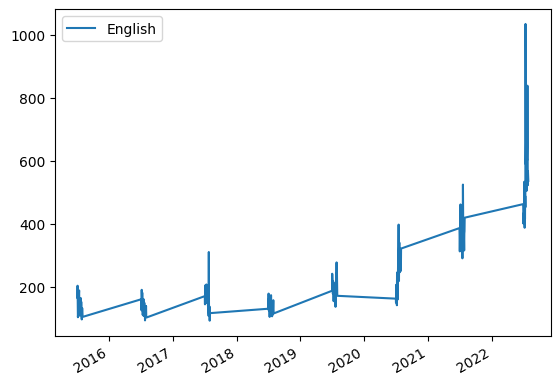

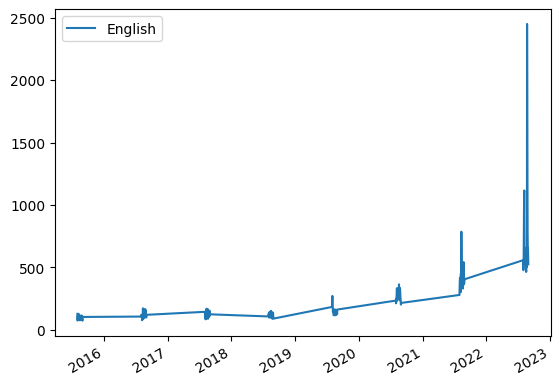

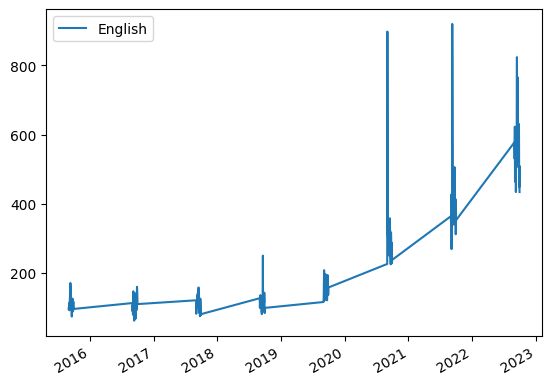

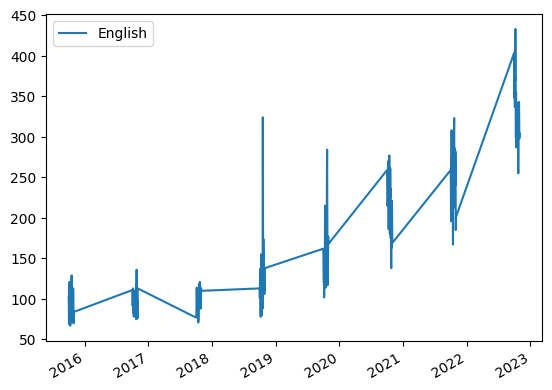

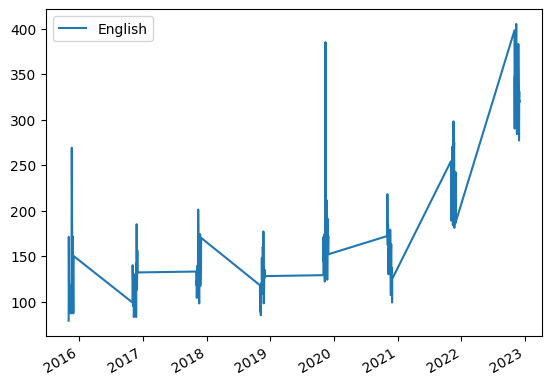

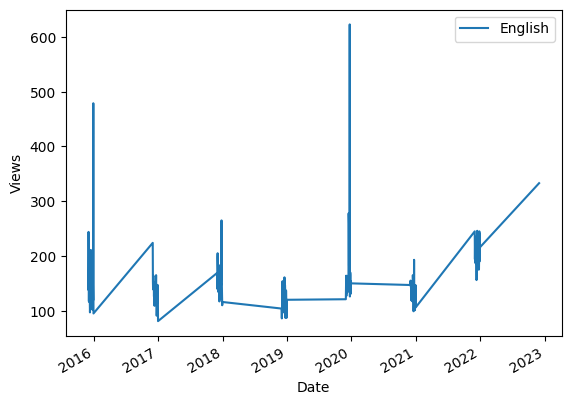

In [45]:
groups = tsd[['English']].groupby(by=[tsd.index.month], sort = True)
groups.plot(subplots=True)
plt.ylabel("Views")
plt.xlabel("Date")
plt.subplots_adjust(hspace=0)
plt.show()

<AxesSubplot:ylabel='English'>

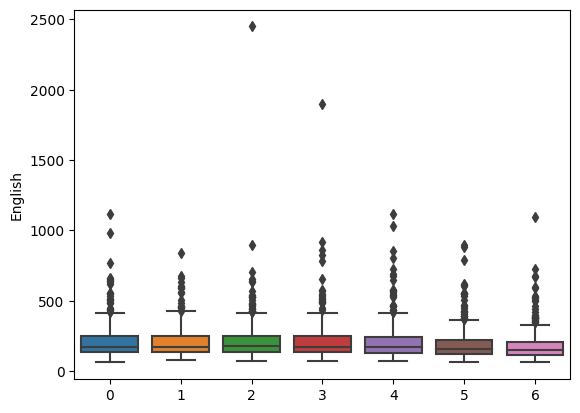

In [46]:
sns.boxplot(data = tsd, x=tsd.index.weekday,y ='English')

<AxesSubplot:ylabel='English'>

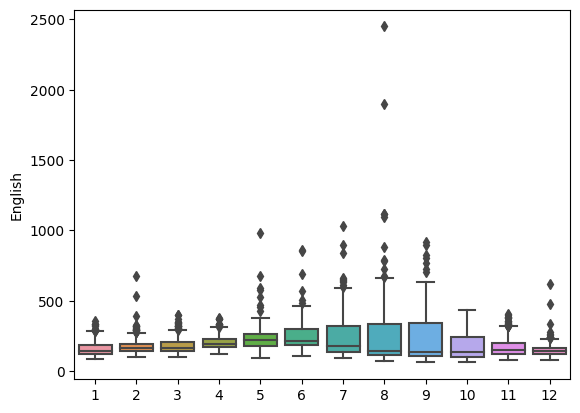

In [47]:
sns.boxplot(data = tsd, x=tsd.index.month,y ='English')

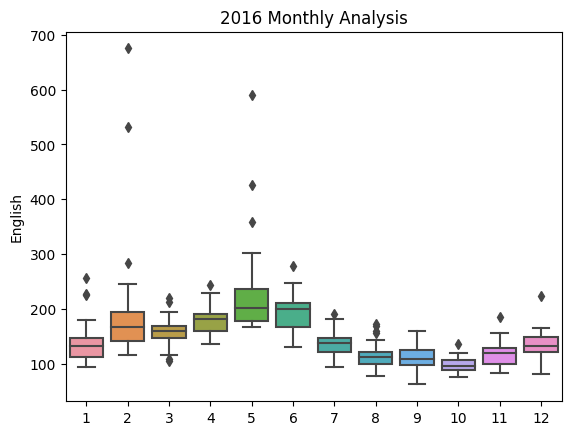

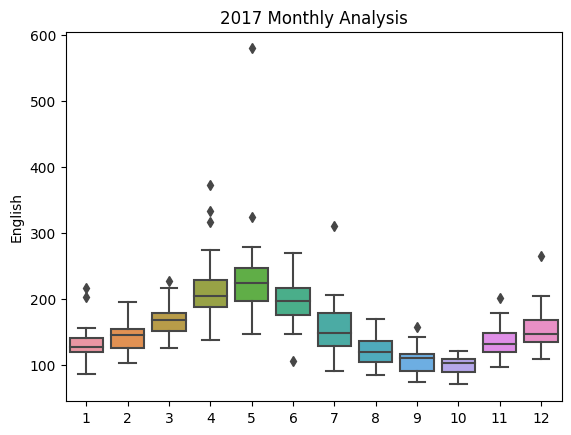

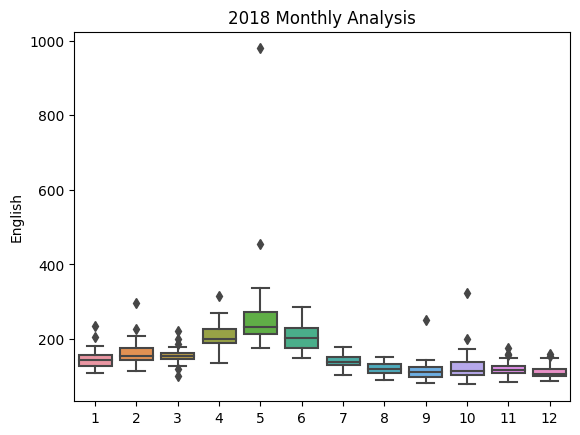

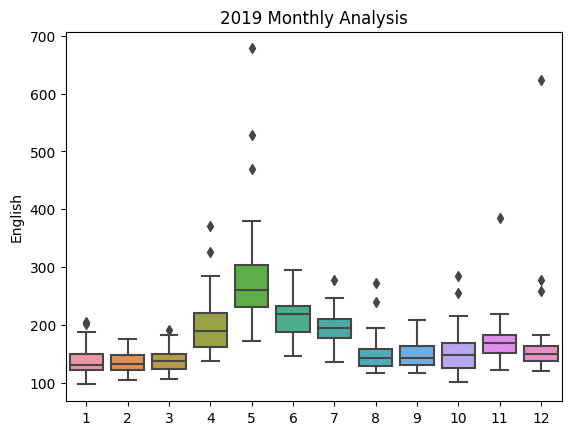

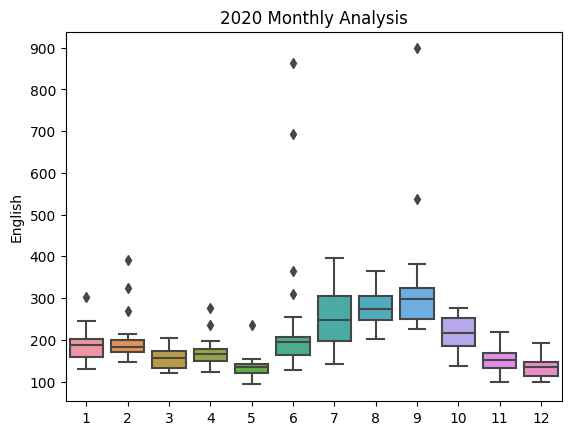

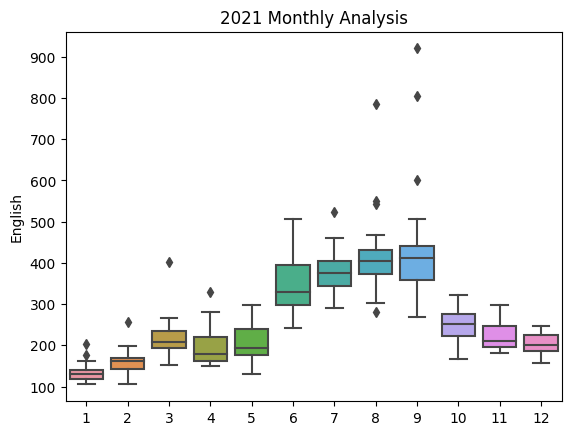

In [48]:
for yr in range(2016, 2022):
    tsd2 = tsd[tsd.index.year == yr]
    sns.boxplot(data = tsd2, x=tsd2.index.month ,y ='English')
    plt.title((str(yr) + " Monthly Analysis"))
    plt.show()


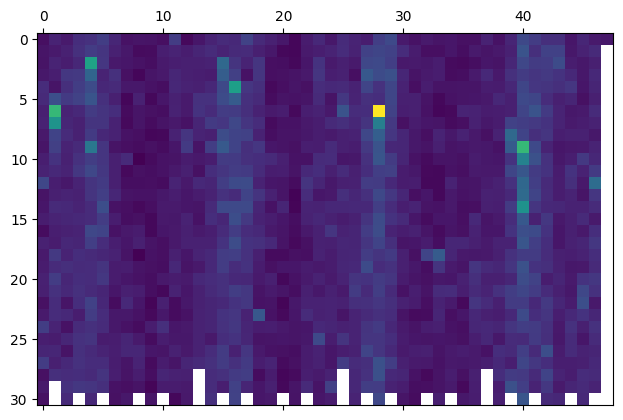

In [49]:
one_year = tsd['English']['01-01-2016':'01-Dec-2019']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = pd.date_range(start="1/Dec/2015", end="1/Dec/2019", freq='M')
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

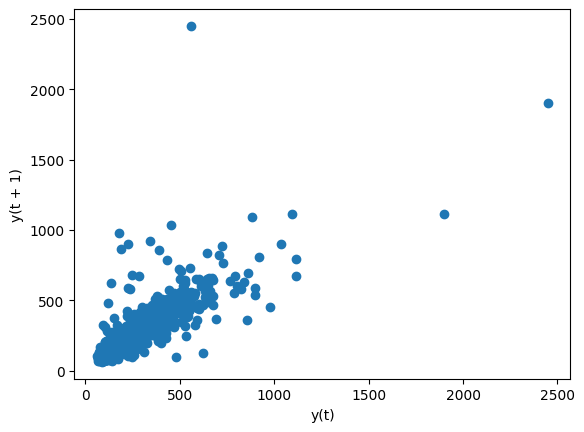

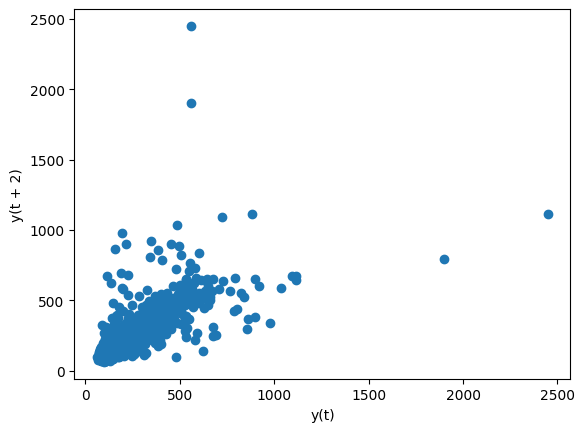

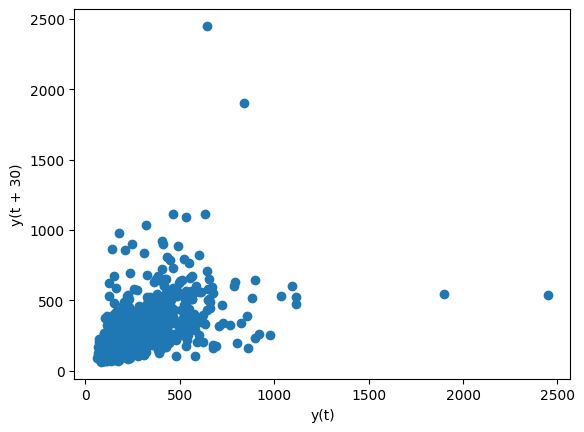

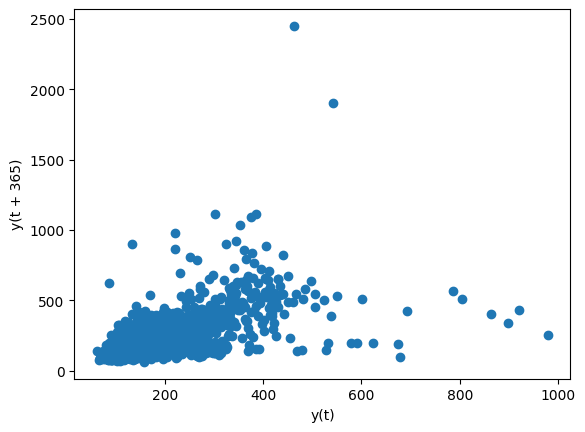

In [50]:
pd.plotting.lag_plot(tsd['English'], lag=1)
plt.show("Lag Plot t vs t+1")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=2)
plt.show("Lag Plot t vs t+2")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=30)
plt.show("Lag Plot t vs t+30")
plt.show()
pd.plotting.lag_plot(tsd['English'], lag=365)
plt.show("Lag Plot t vs t+365")
plt.show()
# High Positive Correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


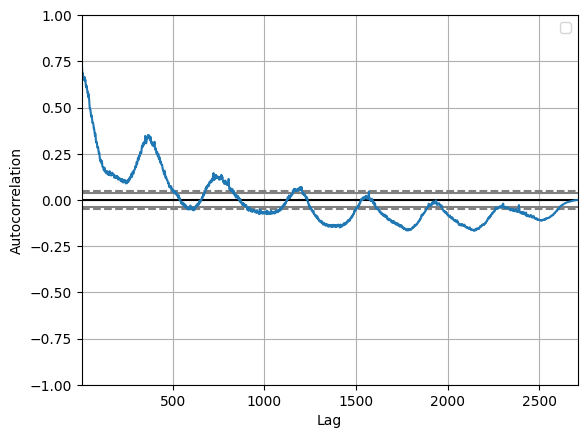

In [51]:
pd.plotting.autocorrelation_plot(tsd['English'])
# highest when lag = 1, 365*n days yearly
plt.legend()

## Resampling and Interpolation

In [52]:
tsd.resample('H').mean()

English  Tamil
2015-07-01 00:00:00    165.0    0.0
2015-07-01 01:00:00      NaN    NaN
2015-07-01 02:00:00      NaN    NaN
2015-07-01 03:00:00      NaN    NaN
2015-07-01 04:00:00      NaN    NaN
...                      ...    ...
2022-11-30 20:00:00      NaN    NaN
2022-11-30 21:00:00      NaN    NaN
2022-11-30 22:00:00      NaN    NaN
2022-11-30 23:00:00      NaN    NaN
2022-12-01 00:00:00    333.0    4.0

[65041 rows x 2 columns]

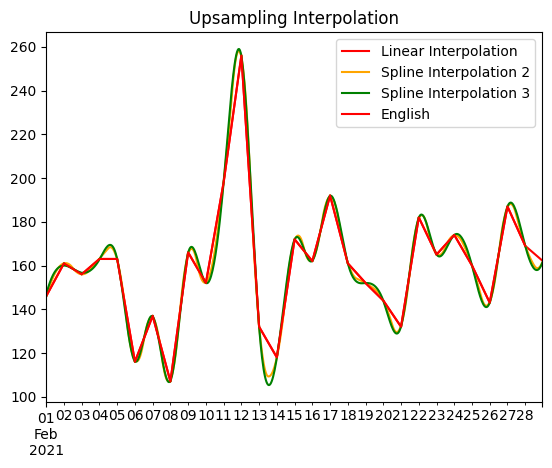

In [53]:
tsd.resample('H').mean().interpolate(method='linear')['English']['Feb-2021'].plot(color='Red', label="Linear Interpolation")
tsd.resample('H').mean().interpolate(method='spline', order=2)['English']['Feb-2021'].plot(color='Orange', label="Spline Interpolation 2")
tsd.resample('H').mean().interpolate(method='spline', order=3)['English']['Feb-2021'].plot(color='Green', label="Spline Interpolation 3")
tsd['English']['Feb-2021'].plot(color='Red')
plt.title("Upsampling Interpolation")
plt.legend()

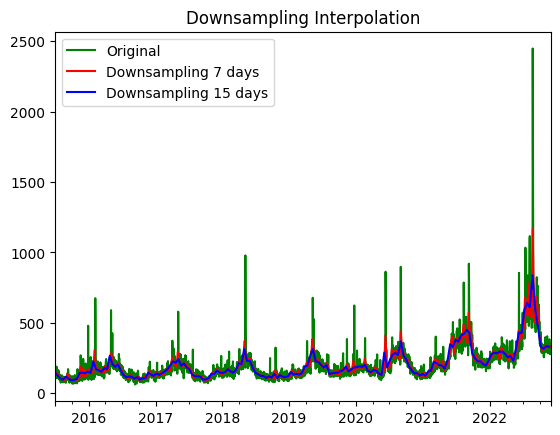

In [54]:
tsd['English'].plot(color='Green', label="Original")
tsd['English'].resample('7D').mean().plot(color='Red', label="Downsampling 7 days")
tsd['English'].resample('15D').mean().plot(color='Blue', label="Downsampling 15 days")
plt.title("Downsampling Interpolation")
plt.legend()

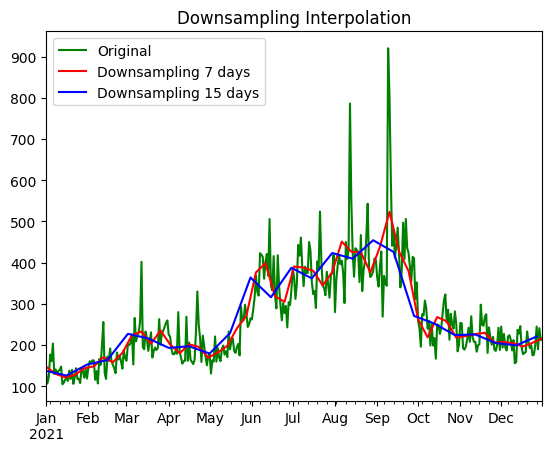

In [55]:
tsd['English']['2021'].plot(color='Green', label="Original")
tsd['English']['2021'].resample('7D').mean().plot(color='Red', label="Downsampling 7 days")
tsd['English']['2021'].resample('15D').mean().plot(color='Blue', label="Downsampling 15 days")
plt.title("Downsampling Interpolation")
plt.legend()

## Power Transformation

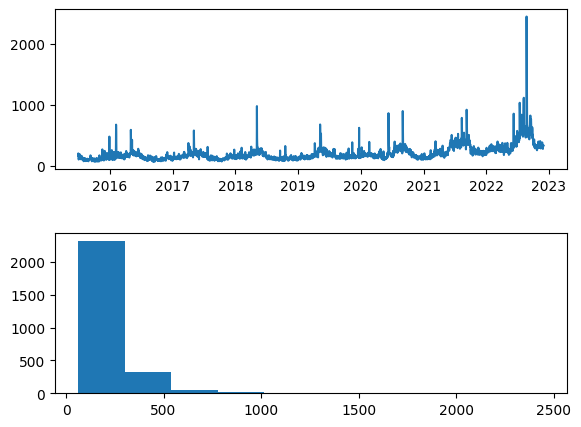

In [56]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(tsd['English'])
# histogram
plt.subplot(212)
plt.hist(tsd['English'])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

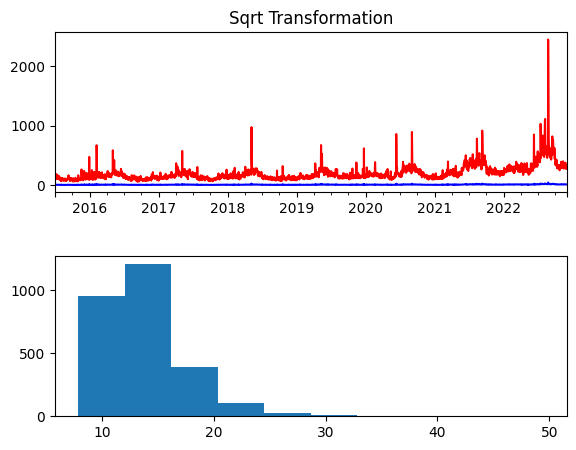

In [57]:
plt.subplot(211)
np.sqrt(tsd['English']).plot(color='Blue')
tsd['English'].plot(color='Red')
plt.title("Sqrt Transformation")
plt.subplot(212)
plt.hist(np.sqrt(tsd['English']))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In [58]:

print('for Sqrt data Results of Dickey-Fuller Test:')
dftest = adfuller(np.sqrt(tsd['English']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Sqrt data Results of Dickey-Fuller Test:
Test Statistic                   -2.307905
p-value                           0.169431
#Lags Used                       27.000000
Number of Observations Used    2683.000000
Critical Value (1%)              -3.432790
Critical Value (5%)              -2.862618
Critical Value (10%)             -2.567344
dtype: float64


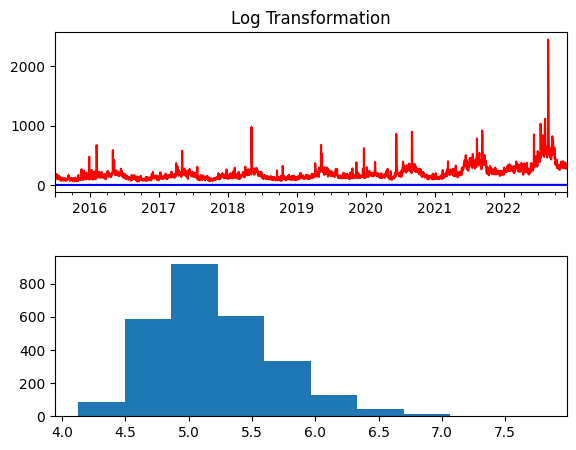

In [59]:
plt.subplot(211)
np.log(tsd['English']).plot(color='Blue', label="Log Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Log Transformation")
plt.subplot(212)
plt.hist(np.log(tsd['English']))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()


In [60]:
print('for Log Trans data Results of Dickey-Fuller Test:')
dftest = adfuller(np.log(tsd['English']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Log Trans data Results of Dickey-Fuller Test:
Test Statistic                   -2.266877
p-value                           0.182873
#Lags Used                       28.000000
Number of Observations Used    2682.000000
Critical Value (1%)              -3.432791
Critical Value (5%)              -2.862618
Critical Value (10%)             -2.567344
dtype: float64


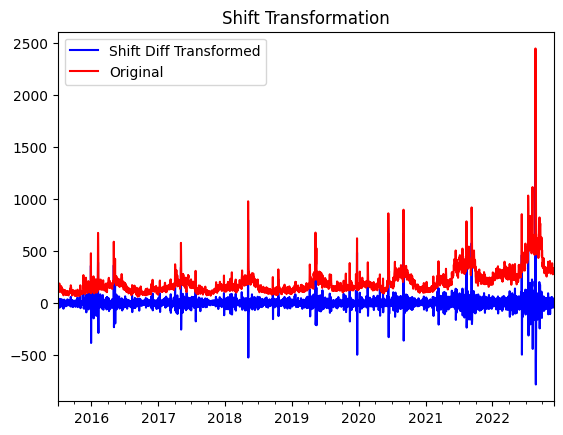

In [61]:
((tsd['English']).diff(1)).plot(color='Blue', label="Shift Diff Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Shift Transformation")
plt.legend()


In [62]:
print('for Shift Diff Trans data Results of Dickey-Fuller Test:')
dftest = adfuller((tsd['English']).diff(1).fillna(0), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for Shift Diff Trans data Results of Dickey-Fuller Test:
Test Statistic                -1.852764e+01
p-value                        2.104971e-30
#Lags Used                     1.900000e+01
Number of Observations Used    2.691000e+03
Critical Value (1%)           -3.432782e+00
Critical Value (5%)           -2.862615e+00
Critical Value (10%)          -2.567342e+00
dtype: float64


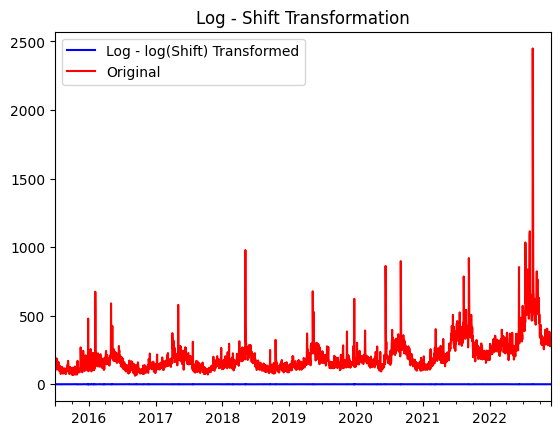

In [63]:
(np.log(tsd['English']) - np.log(tsd['English']).shift()).plot(color='Blue', label="Log - log(Shift) Transformed")
tsd['English'].plot(color='Red', label="Original")
plt.title("Log - Shift Transformation")
plt.legend()


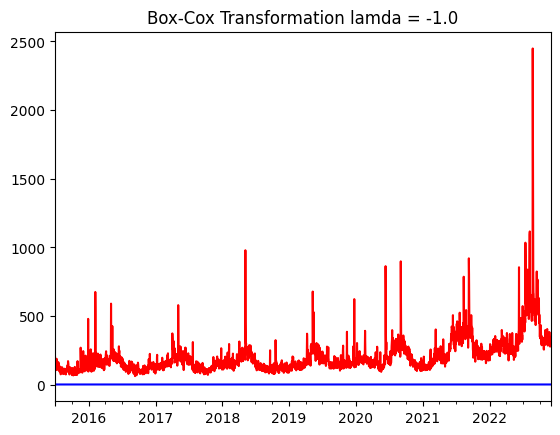

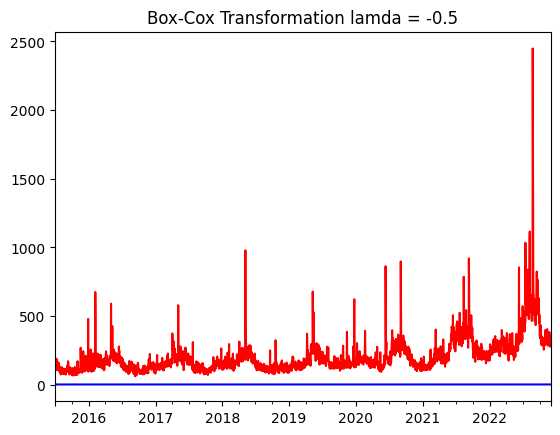

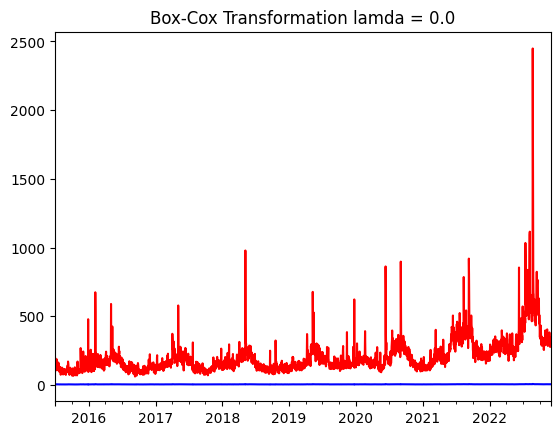

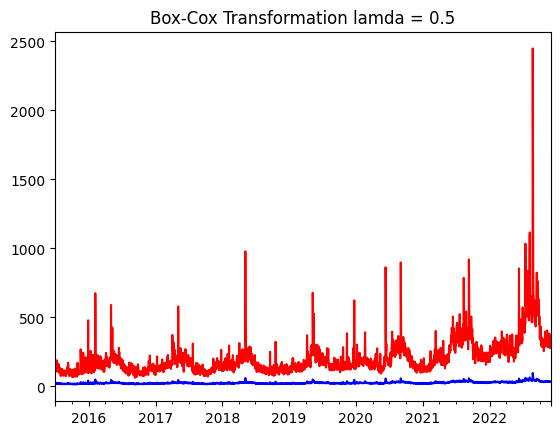

In [64]:
from scipy.stats import boxcox
for i in np.arange(-1,1,0.5):
    boxcox(tsd['English'], lmbda=i).plot(color='Blue')
    tsd['English'].plot(color='Red')
    plt.title(str("Box-Cox Transformation lamda = "+ str(i)))
    plt.show()

In [65]:
print('for normal data Results of Dickey-Fuller Test:')
dftest = adfuller(tsd['English'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


for normal data Results of Dickey-Fuller Test:
Test Statistic                   -2.732637
p-value                           0.068559
#Lags Used                       20.000000
Number of Observations Used    2690.000000
Critical Value (1%)              -3.432783
Critical Value (5%)              -2.862615
Critical Value (10%)             -2.567342
dtype: float64


## Moving Average Smoothing

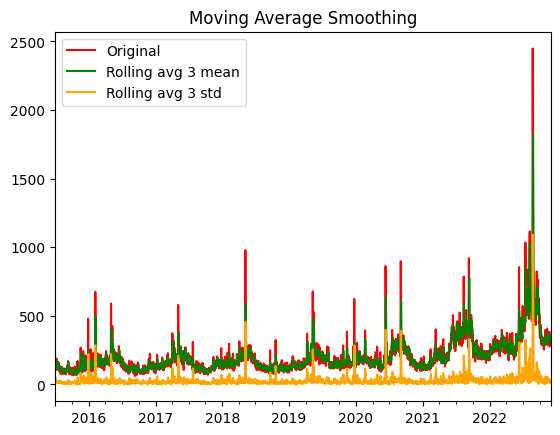

In [66]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
tsd['English'].rolling(window=3).std().plot(color='Orange', label="Rolling avg 3 std")
plt.title("Moving Average Smoothing")
plt.legend()

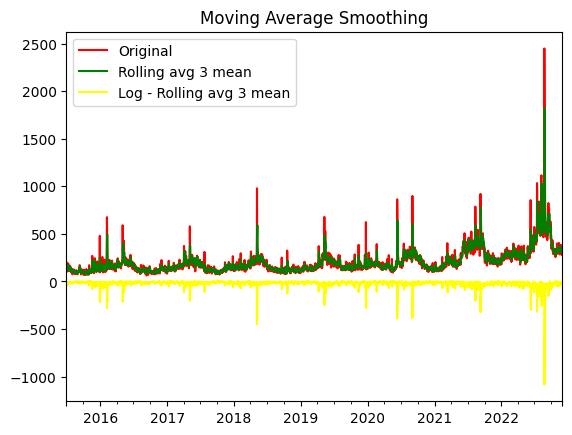

In [67]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].rolling(window=3).mean().plot(color='Green', label="Rolling avg 3 mean")
(np.log(tsd['English']) - tsd['English'].rolling(window=3).std()).plot(color='Yellow', label="Log - Rolling avg 3 mean")
plt.title("Moving Average Smoothing")
plt.legend()

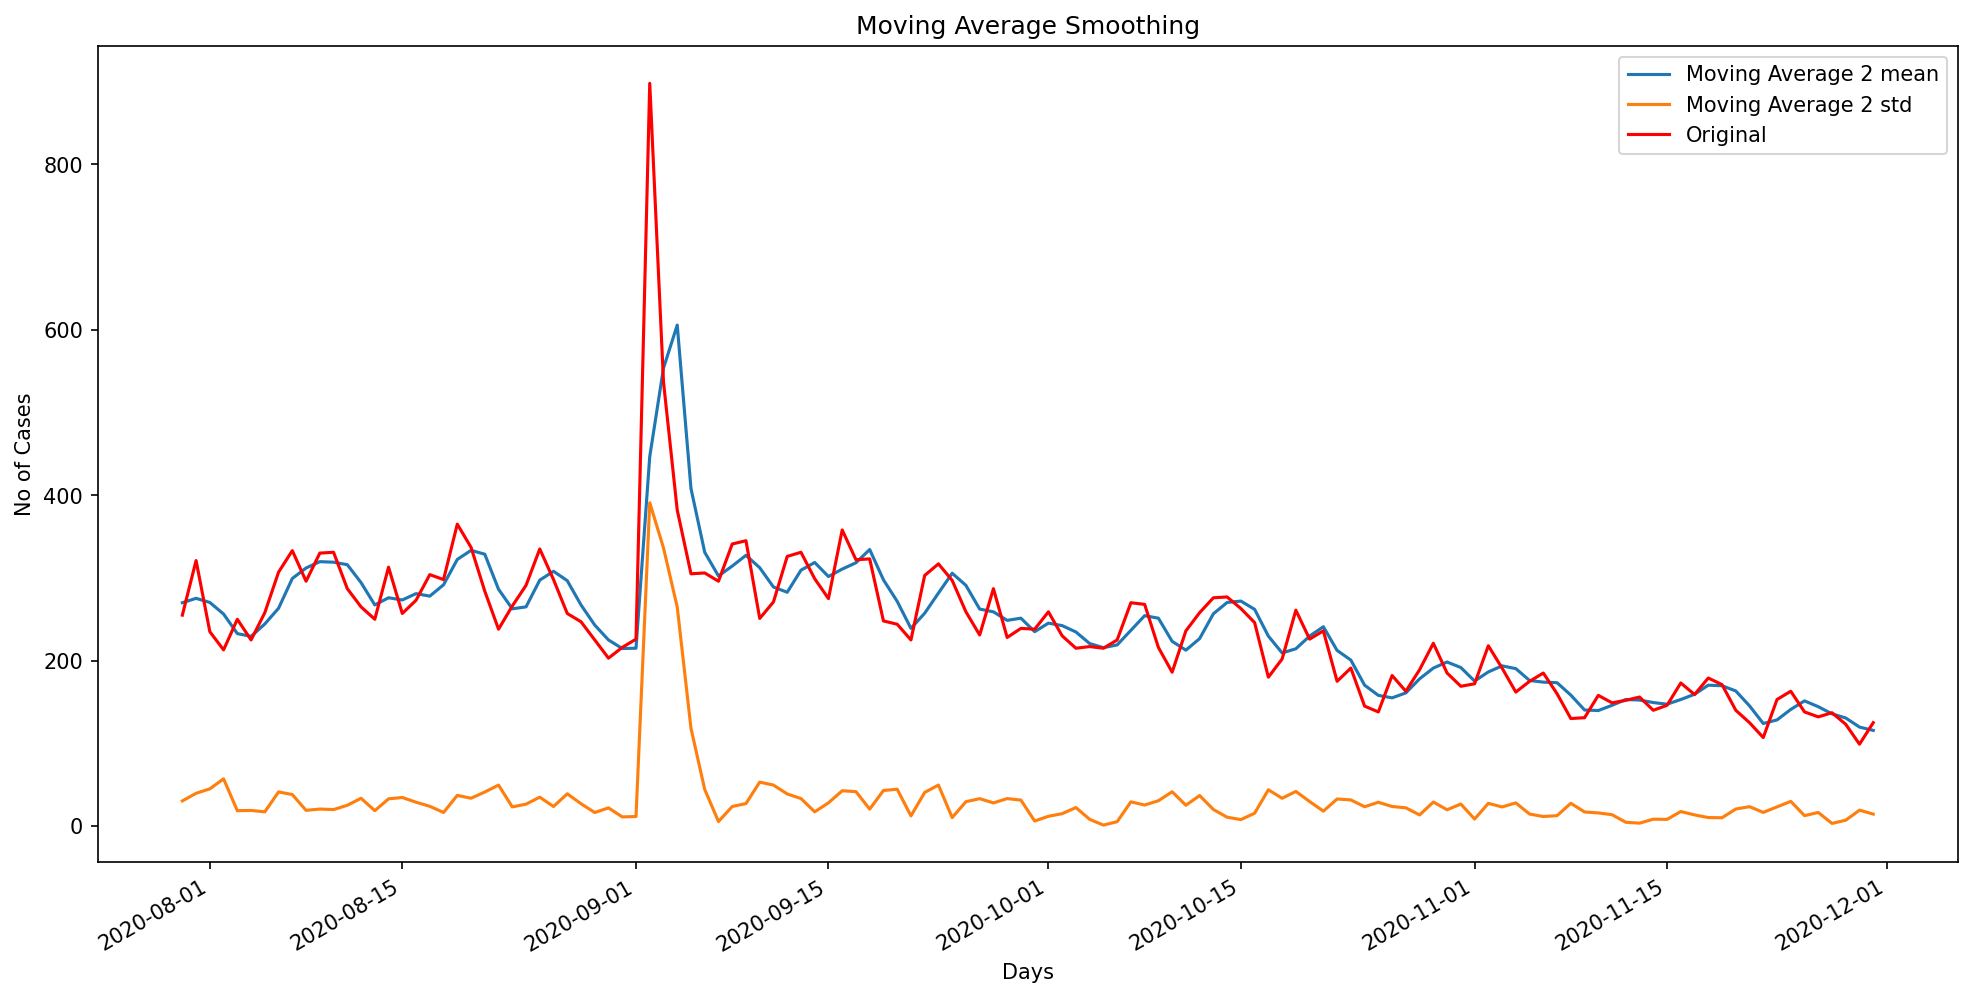

In [68]:
plt.figure(figsize=(16, 8), dpi=150) 
x = pd.date_range(start='30/Jul/2020', end='30/Nov/2020', freq='D')

y = tsd['English'].rolling(window=3).mean()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 mean")
y = tsd['English'].rolling(window=3).std()['30/Jul/2020':'30/Nov/2020']
plt.plot(x, y, label="Moving Average 2 std")
tsd['English']['30/Jul/2020':'30/Nov/2020'].plot(color='Red', label="Original")

plt.title("Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()


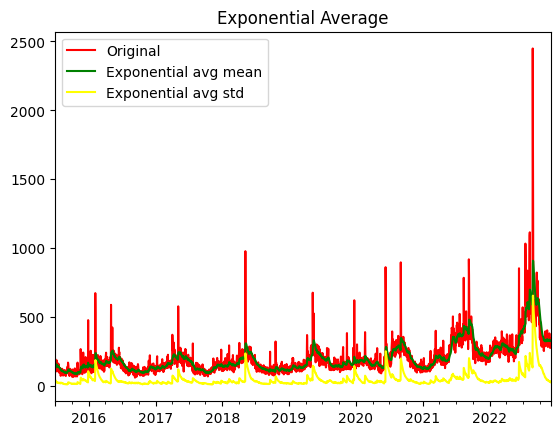

In [69]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].ewm(alpha=0.1).mean().plot(color='Green', label="Exponential avg mean")
tsd['English'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
plt.title("Exponential Average")
plt.legend()

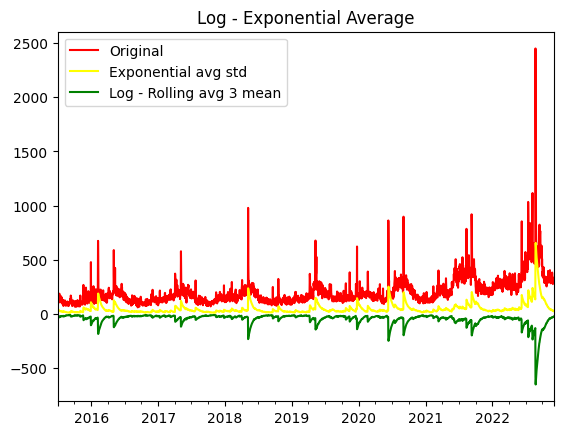

In [70]:
tsd['English'].plot(color='Red', label="Original")
tsd['English'].ewm(alpha=0.1).std().plot(color='Yellow', label="Exponential avg std")
(np.log(tsd['English']) - tsd['English'].ewm(alpha=0.1).std()).plot(color='Green', label="Log - Rolling avg 3 mean")
plt.title("Log - Exponential Average")
plt.legend()

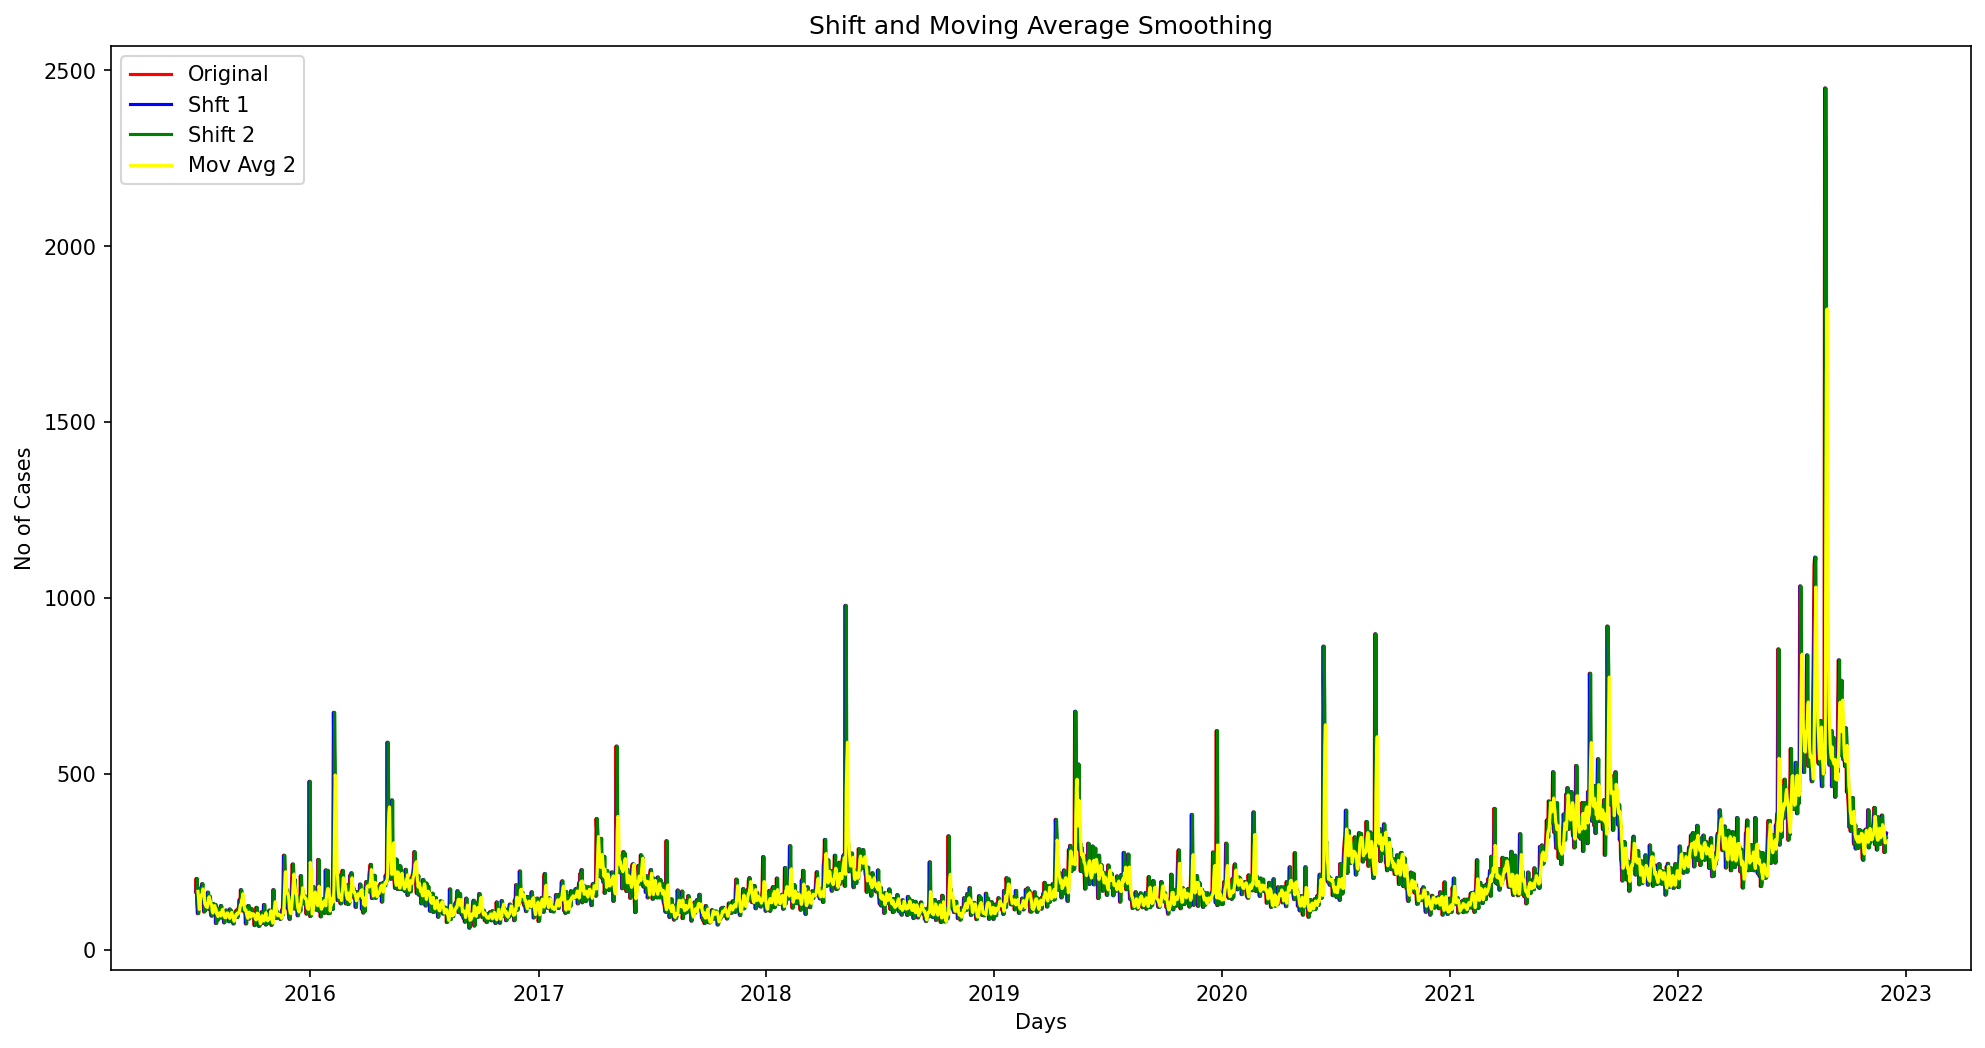

In [71]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['English'], color='Red', label="Original")
plt.plot(tsd['English'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['English'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['English'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

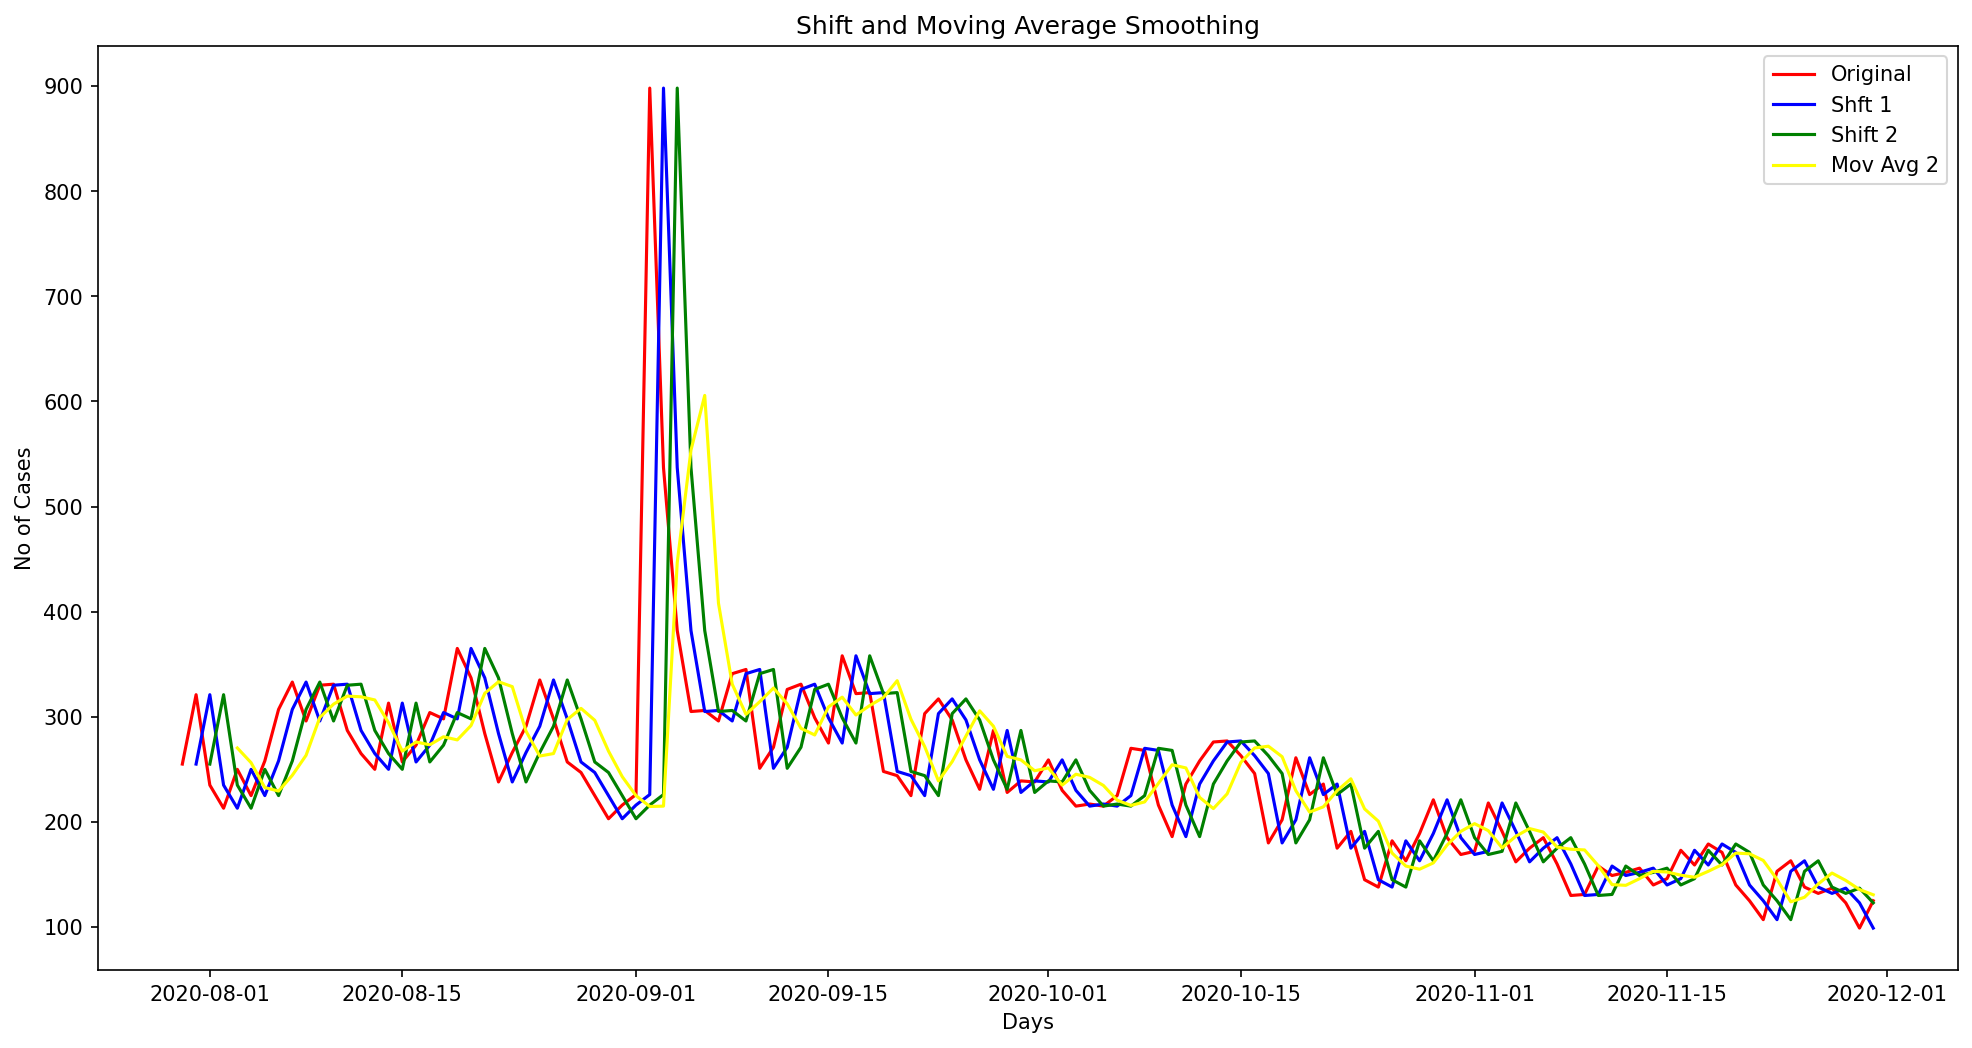

In [72]:
plt.figure(figsize=(16, 8), dpi=150) 

width = 3
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'], color='Red', label="Original")
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(1), color='Blue', label="Shft 1")
plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(width - 1), color='Green', label="Shift 2")

plt.plot(tsd['English']['30/Jul/2020':'30/Nov/2020'].shift(width - 1).rolling(window=width).mean(), color='Yellow', label="Mov Avg 2")
plt.title("Shift and Moving Average Smoothing")
plt.xlabel('Days') 
plt.ylabel('No of Cases')
plt.legend()

predicted=166.333333, expected=103.000000
predicted=145.666667, expected=112.000000
predicted=115.333333, expected=132.000000
predicted=115.666667, expected=174.000000
predicted=139.333333, expected=148.000000
predicted=151.333333, expected=153.000000
predicted=158.333333, expected=179.000000
predicted=160.000000, expected=188.000000
predicted=173.333333, expected=144.000000
predicted=170.333333, expected=141.000000
predicted=157.666667, expected=108.000000
predicted=131.000000, expected=148.000000
predicted=132.333333, expected=113.000000
predicted=123.000000, expected=118.000000
predicted=126.333333, expected=131.000000
predicted=120.666667, expected=142.000000
predicted=130.333333, expected=164.000000
predicted=145.666667, expected=147.000000
predicted=151.000000, expected=115.000000
predicted=142.000000, expected=152.000000
predicted=138.000000, expected=125.000000
predicted=130.666667, expected=105.000000
predicted=127.333333, expected=96.000000
predicted=108.666667, expected=113.

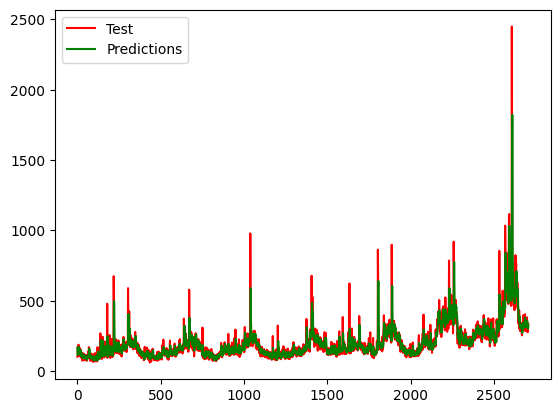

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = tsd['English']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
print('Test MAE: %.3f' % np.sqrt(mean_absolute_error(test, predictions)))
print('Test MSE: %.3f' % (mean_squared_error(test, predictions)))
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions)))
print('R2 Square: %.3f' % np.sqrt(r2_score(test, predictions)))

plt.plot(test, color='Red', label="Test")
plt.plot(predictions, color='Green', label="Predictions")
plt.legend()

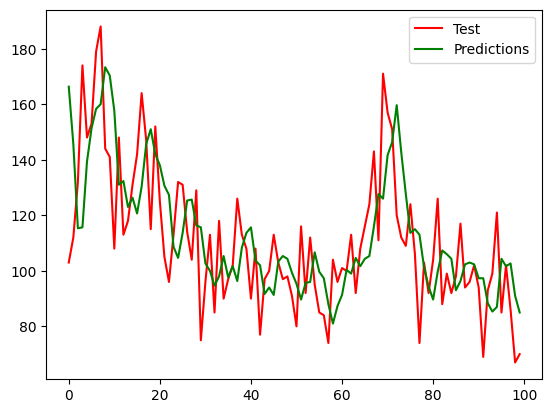

In [74]:
# zoom plot
plt.plot(test[:100],color='Red', label="Test")
plt.plot(predictions[:100], color='Green', label="Predictions")
plt.legend()

## White Noise

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


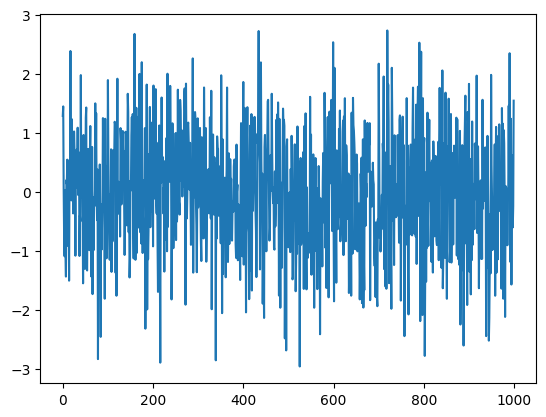

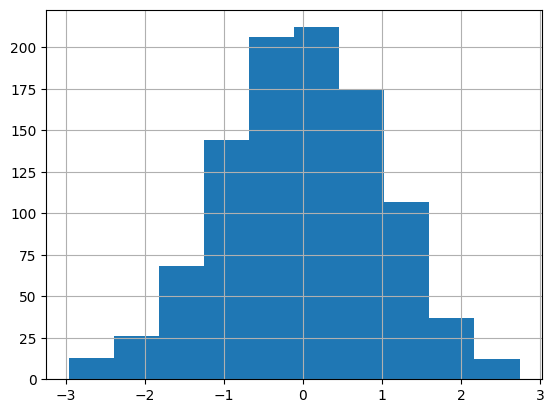

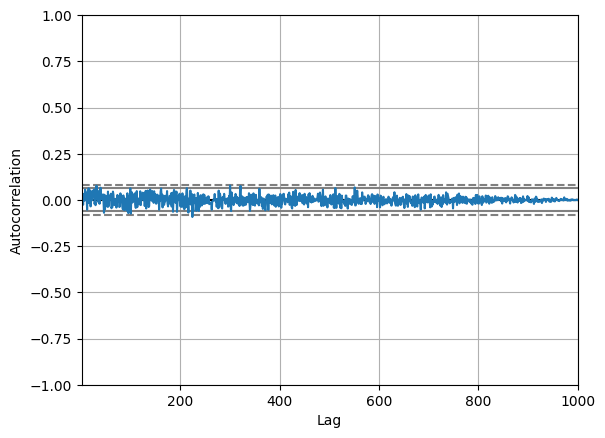

In [75]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
# seed random number generator
rd.seed(1)
# create white noise series
series = [rd.gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)
print(series.describe())

series.plot()
plt.show()

series.hist()
plt.show()

pd.plotting.autocorrelation_plot(series)
plt.show()

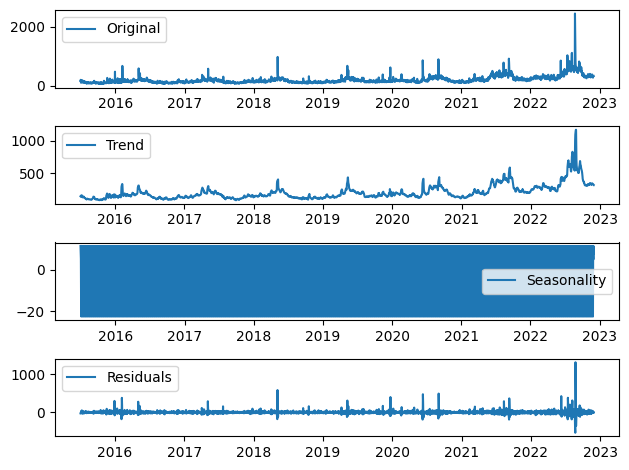

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsd['English'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(tsd['English'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


count    2705.000000
mean       -0.010802
std        55.411512
min      -535.781342
25%       -17.387325
50%        -2.511912
75%        13.076171
max      1312.579131
Name: resid, dtype: float64


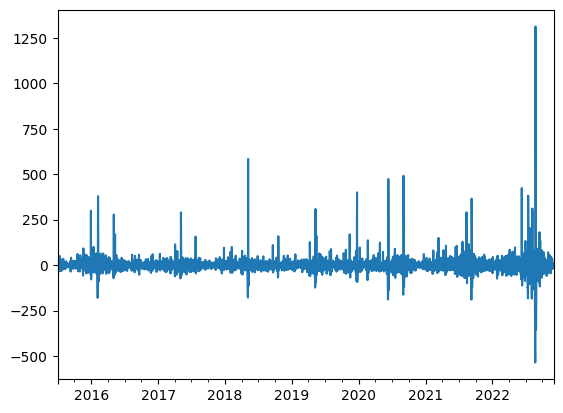

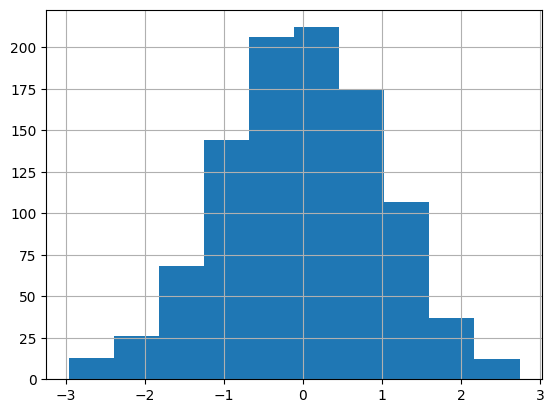

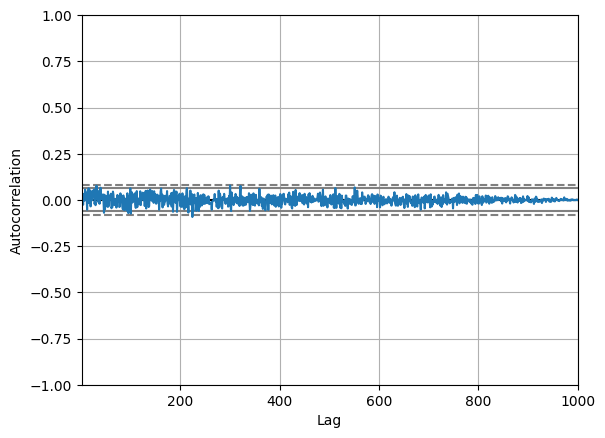

In [77]:
print(residual.describe())
residual.plot()
plt.show()
series.hist()
plt.show()
pd.plotting.autocorrelation_plot(series)
plt.show()

## Random Walk

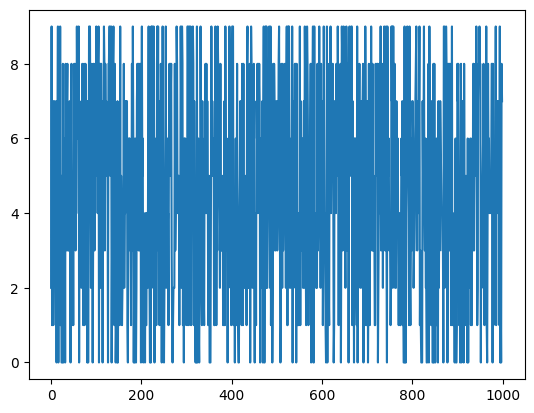

In [78]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

rd.seed(1)
series = [rd.randrange(10) for i in range(1000)]
plt.plot(series)
plt.show()

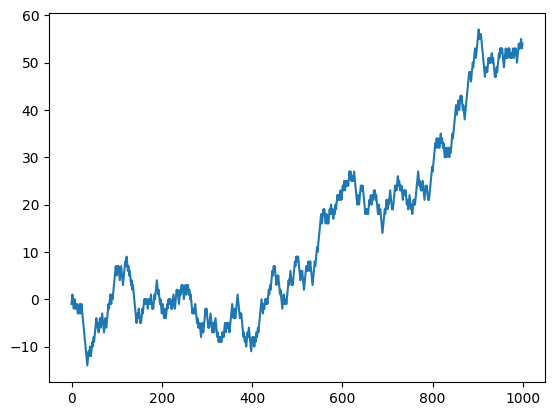

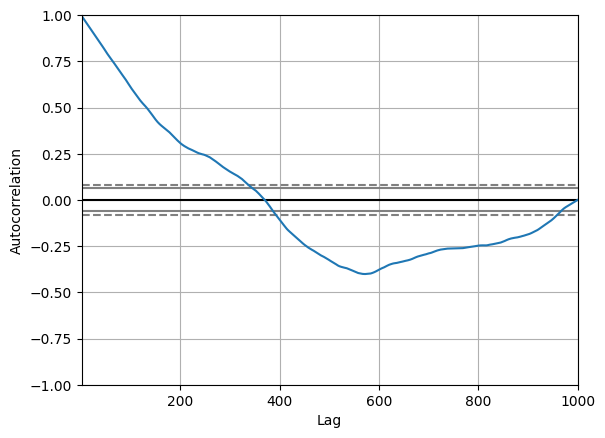

---Augmented Dickey-Fuller test---
ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


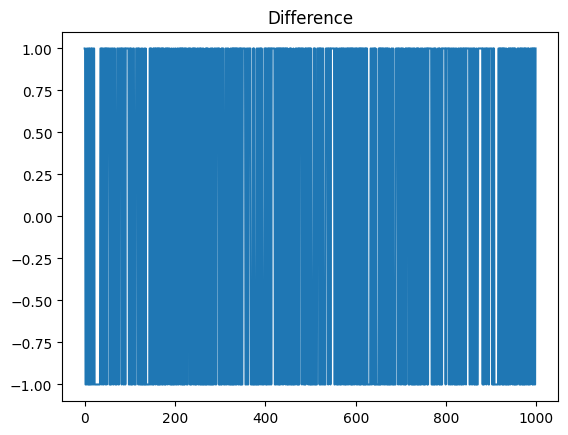

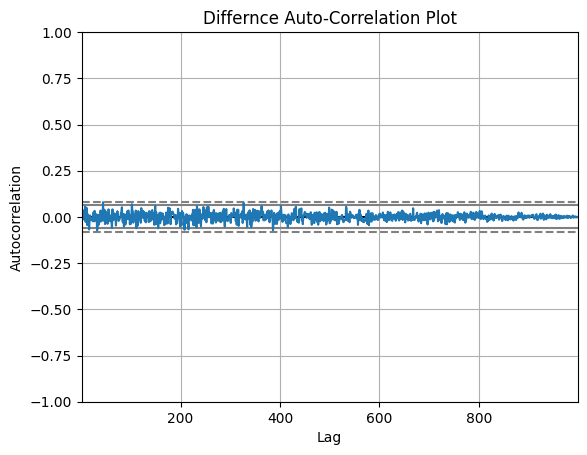

---Difference Augmented Dickey-Fuller test---
ADF Statistic: -31.084824
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [79]:
rd.seed(1)
random_walk = list()
random_walk.append(-1 if rd.random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if rd.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.show()
pd.plotting.autocorrelation_plot(random_walk)
plt.show()

print("---Augmented Dickey-Fuller test---")
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
plt.plot(diff)
plt.title("Difference")
plt.show()

pd.plotting.autocorrelation_plot(diff)
plt.title("Differnce Auto-Correlation Plot")
plt.show()

print("---Difference Augmented Dickey-Fuller test---")
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [80]:
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [81]:
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if rd.random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


## Decomposition

Additive Decomposition
2015-07-01           NaN
2015-07-02           NaN
2015-07-03           NaN
2015-07-04    145.714286
2015-07-05    143.285714
                 ...    
2022-11-27    318.142857
2022-11-28    316.428571
2022-11-29           NaN
2022-11-30           NaN
2022-12-01           NaN
Freq: D, Name: trend, Length: 2711, dtype: float64
2015-07-01    11.420869
2015-07-02     7.797626
2015-07-03     5.209544
2015-07-04   -14.520760
2015-07-05   -22.612675
                ...    
2022-11-27   -22.612675
2022-11-28     7.781197
2022-11-29     4.924199
2022-11-30    11.420869
2022-12-01     7.797626
Freq: D, Name: seasonal, Length: 2711, dtype: float64
2015-07-01          NaN
2015-07-02          NaN
2015-07-03          NaN
2015-07-04   -28.193526
2015-07-05    -8.673039
                ...    
2022-11-27   -18.530182
2022-11-28    -3.209768
2022-11-29          NaN
2022-11-30          NaN
2022-12-01          NaN
Freq: D, Name: resid, Length: 2711, dtype: float64
2015-07-01    165.

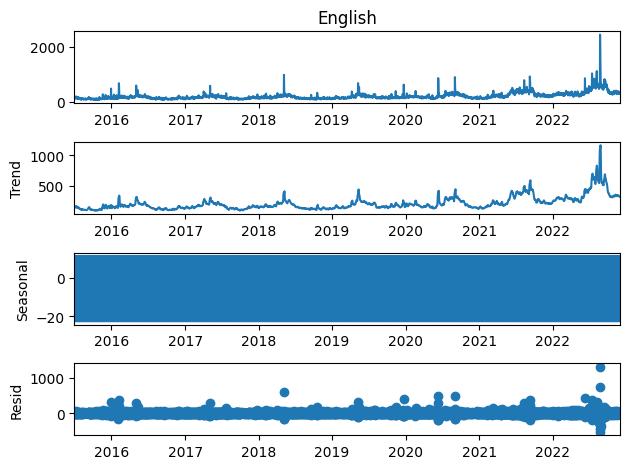

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
import random as rd 
import matplotlib.pyplot as plt

result = seasonal_decompose(tsd['English'], model='additive')
print("Additive Decomposition")
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.show()

Multiplicative Decomposition
2015-07-01           NaN
2015-07-02           NaN
2015-07-03           NaN
2015-07-04    145.714286
2015-07-05    143.285714
                 ...    
2022-11-27    318.142857
2022-11-28    316.428571
2022-11-29           NaN
2022-11-30           NaN
2022-12-01           NaN
Freq: D, Name: trend, Length: 2711, dtype: float64
2015-07-01    1.053550
2015-07-02    1.028774
2015-07-03    1.016466
2015-07-04    0.926674
2015-07-05    0.893360
                ...   
2022-11-27    0.893360
2022-11-28    1.042204
2022-11-29    1.038972
2022-11-30    1.053550
2022-12-01    1.028774
Freq: D, Name: seasonal, Length: 2711, dtype: float64
2015-07-01         NaN
2015-07-02         NaN
2015-07-03         NaN
2015-07-04    0.762795
2015-07-05    0.874961
                ...   
2022-11-27    0.974610
2022-11-28    0.973367
2022-11-29         NaN
2022-11-30         NaN
2022-12-01         NaN
Freq: D, Name: resid, Length: 2711, dtype: float64
2015-07-01    165.0
2015-07-02    

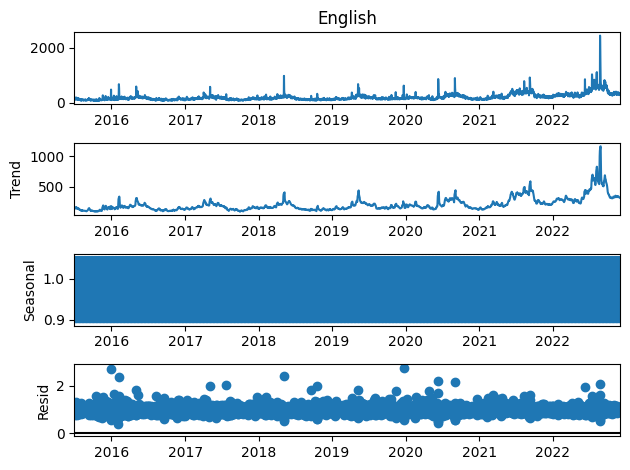

In [83]:
result = seasonal_decompose(tsd['English'], model='multiplicative')
print("Multiplicative Decomposition")
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.show()

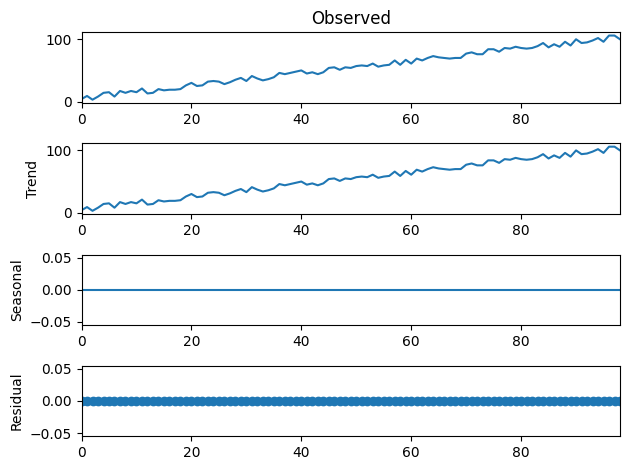

In [84]:
series = [i+rd.randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show() 

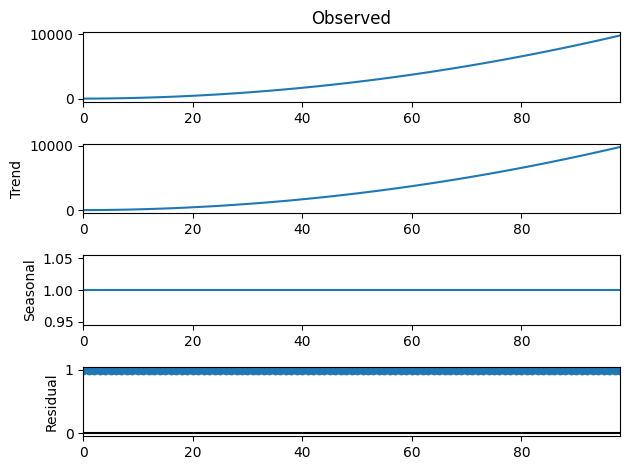

In [85]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
plt.show()

## Trends

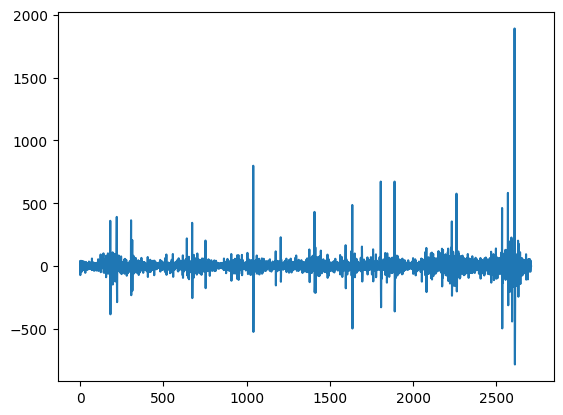

In [86]:
X = tsd['English']
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
plt.plot(diff)
plt.show()

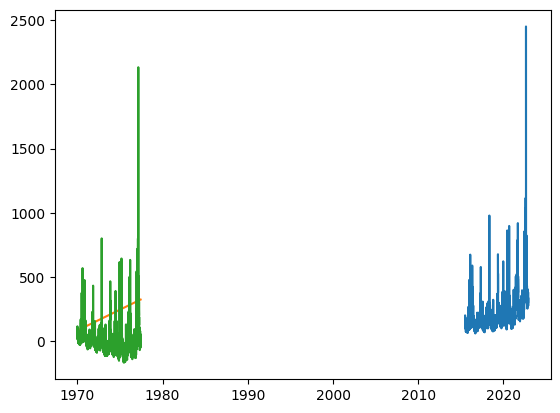

In [87]:
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(tsd['English']))]
X = np.reshape(X, (len(X), 1))
y = tsd['English']
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(y)
plt.plot(trend)

detrended = [y[i]-trend[i] for i in range(0, len(tsd['English']))]
plt.plot(detrended)
plt.show()

## Seasonality

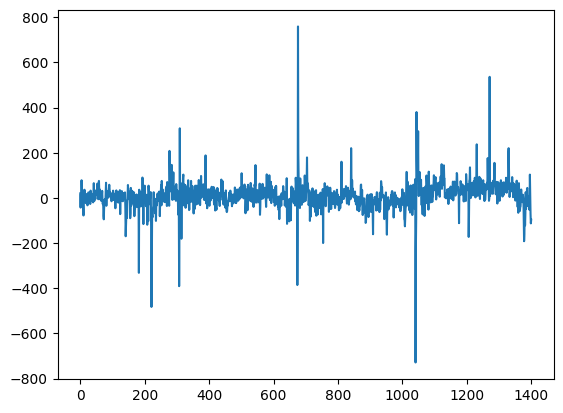

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

X = tsd['English'][:'Apr-2020']
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

2015-07-31    136.483871
2015-08-31     98.967742
2015-09-30    111.233333
2015-10-31     91.000000
2015-11-30    126.466667
2015-12-31    154.741935
2016-01-31    139.806452
2016-02-29    201.344828
2016-03-31    158.483871
2016-04-30    179.133333
2016-05-31    231.548387
2016-06-30    193.500000
2016-07-31    136.161290
Freq: M, Name: English, dtype: float64


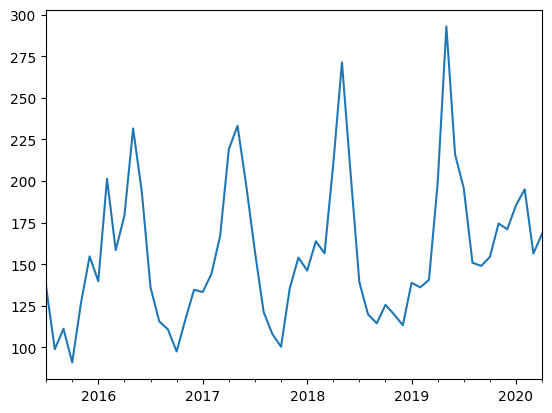

In [89]:
resample = X.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

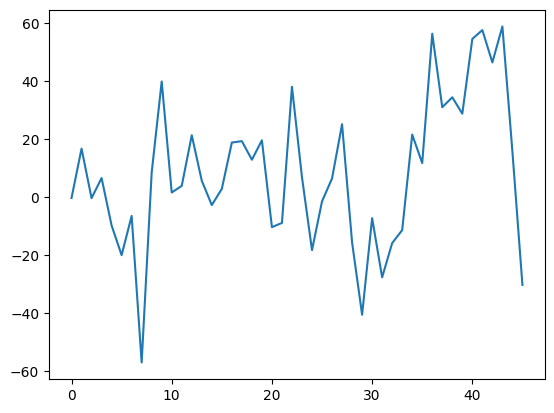

In [90]:
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

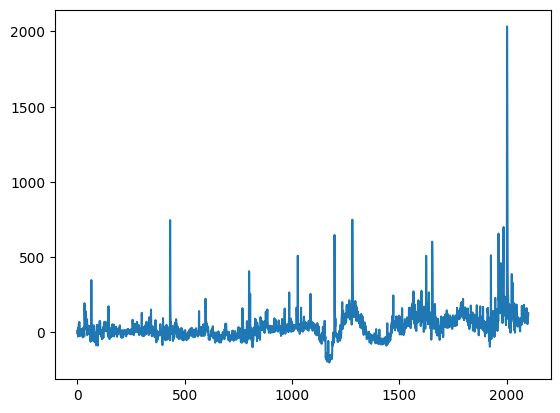

In [91]:
series = tsd['English']["Mar-2016":]
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
plt.plot(diff)
plt.show()

Coefficients: [-1.26043843e-08 -1.08414096e-06  4.94079199e-03 -8.91081161e-01
  1.60138585e+02]


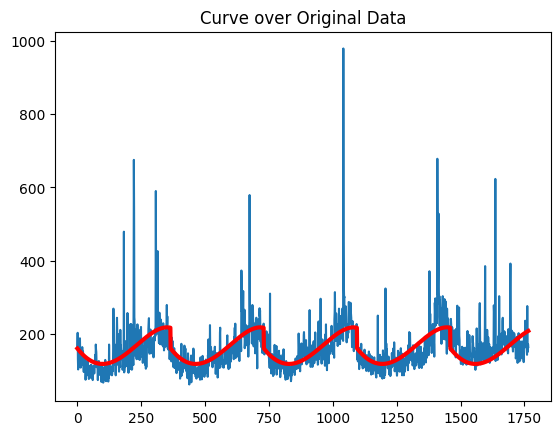

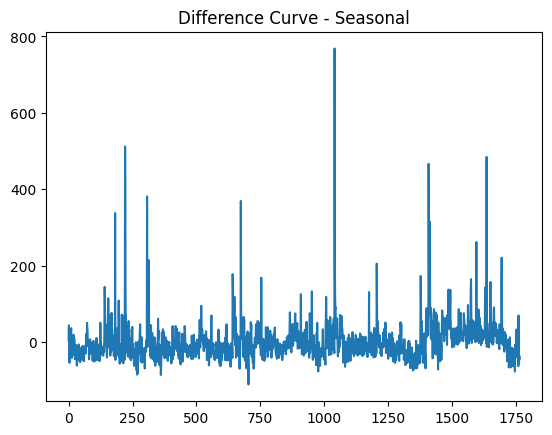

In [92]:
series = tsd['English'][:'Apr-2020']

X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# plot curve over original data
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.title("Curve over Original Data")
plt.show()

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.title("Difference Curve - Seasonal")
plt.show()

## Stationarity

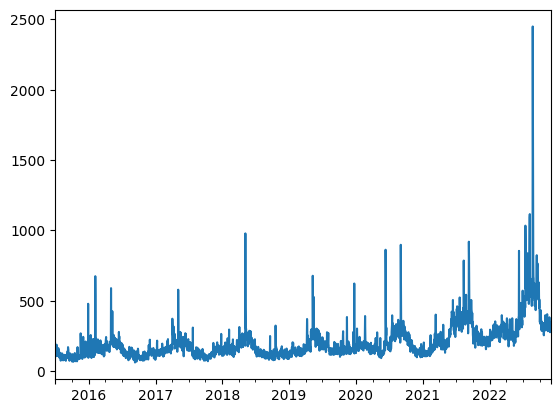

In [95]:
series = tsd['English']
series.plot()
plt.show()

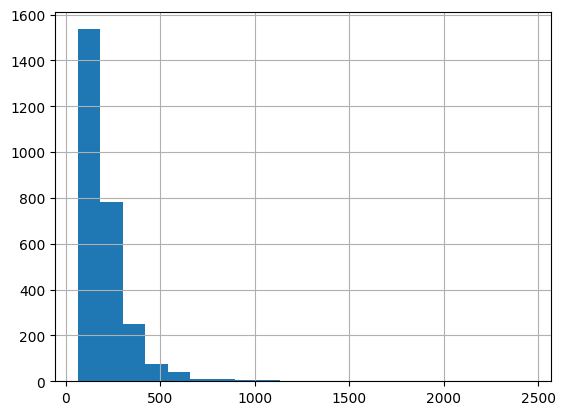

In [98]:
series.hist(bins=20)
plt.show()

In [108]:
X = series.values
split = int(len(X) / 90)
for i in range(split):
    print((i+1))
    print('mean = %f ' % (X[0:i+1].mean()))
    print('variance = %f ' % (X[0:i+1].var()))

1
mean = 165.000000 
variance = 0.000000 
2
mean = 184.000000 
variance = 361.000000 
3
mean = 166.333333 
variance = 864.888889 
4
mean = 150.500000 
variance = 1400.750000 
5
mean = 142.800000 
variance = 1357.760000 
6
mean = 141.000000 
variance = 1147.666667 
7
mean = 145.714286 
variance = 1117.061224 
8
mean = 146.000000 
variance = 978.000000 
9
mean = 146.777778 
variance = 874.172840 
10
mean = 150.000000 
variance = 880.200000 
11
mean = 153.454545 
variance = 919.520661 
12
mean = 152.666667 
variance = 849.722222 
13
mean = 151.769231 
variance = 794.023669 
14
mean = 148.642857 
variance = 864.372449 
15
mean = 148.600000 
variance = 806.773333 
16
mean = 146.375000 
variance = 830.609375 
17
mean = 144.705882 
variance = 826.325260 
18
mean = 143.944444 
variance = 790.274691 
19
mean = 143.842105 
variance = 748.869806 
20
mean = 144.850000 
variance = 730.727500 
21
mean = 144.952381 
variance = 696.140590 
22
mean = 143.590909 
variance = 703.423554 
23
mean = 143.956

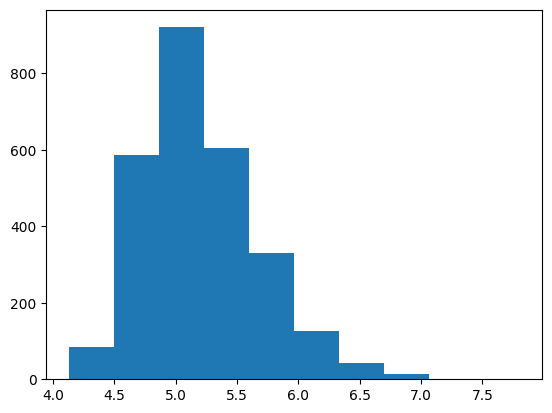

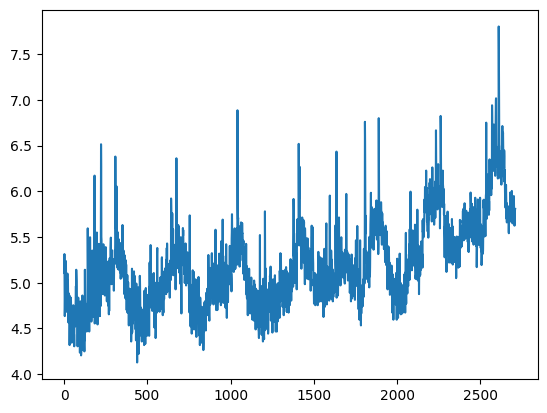

In [114]:
plt.hist(np.log(series.values))
plt.show()
plt.plot(np.log(series.values))
plt.show()

In [122]:
X = np.log(series.values)
split = int(len(X) / 90)
for i in range(split):
    print((i+1))
    print('mean = %f ' % (X[0:i+1].mean()))
    print('variance = %f ' % (X[0:i+1].var()))

1
mean = 5.105945 
variance = 0.000000 
2
mean = 5.209576 
variance = 0.010739 
3
mean = 5.098116 
variance = 0.032006 
4
mean = 4.982269 
variance = 0.064266 
5
mean = 4.929515 
variance = 0.062545 
6
mean = 4.921730 
variance = 0.052424 
7
mean = 4.955633 
variance = 0.051831 
8
mean = 4.960831 
variance = 0.045541 
9
mean = 4.968565 
variance = 0.040960 
10
mean = 4.990447 
variance = 0.041173 
11
mean = 5.012810 
variance = 0.042431 
12
mean = 5.009227 
variance = 0.039037 
13
mean = 5.004576 
variance = 0.036293 
14
mean = 4.981544 
variance = 0.040597 
15
mean = 4.982589 
variance = 0.037906 
16
mean = 4.966639 
variance = 0.039353 
17
mean = 4.955112 
variance = 0.039164 
18
mean = 4.950672 
variance = 0.037323 
19
mean = 4.950943 
variance = 0.035360 
20
mean = 4.958390 
variance = 0.034646 
21
mean = 4.959915 
variance = 0.033042 
22
mean = 4.950143 
variance = 0.033546 
23
mean = 4.953349 
variance = 0.032313 
24
mean = 4.948140 
variance = 0.031591 
25
mean = 4.936372 
varia

In [126]:
X = tsd['English'][:'Apr-2020'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.782873
p-value: 0.003087
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Backtest Forecast Models

Observations: 2711
Training Observations: 1789
Testing Observations: 922


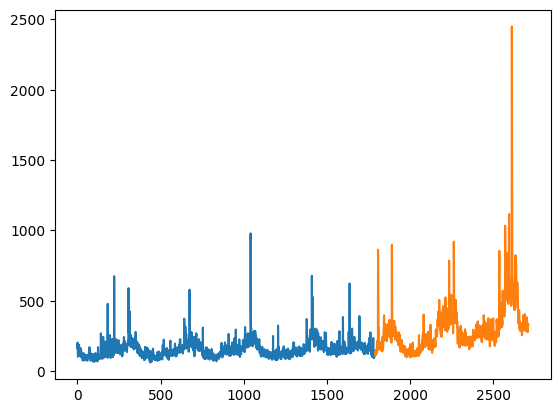

In [136]:
X = tsd['English'].values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

Observations: 1357
Training Observations: 680
Testing Observations: 677
Observations: 2034
Training Observations: 1357
Testing Observations: 677
Observations: 2711
Training Observations: 2034
Testing Observations: 677


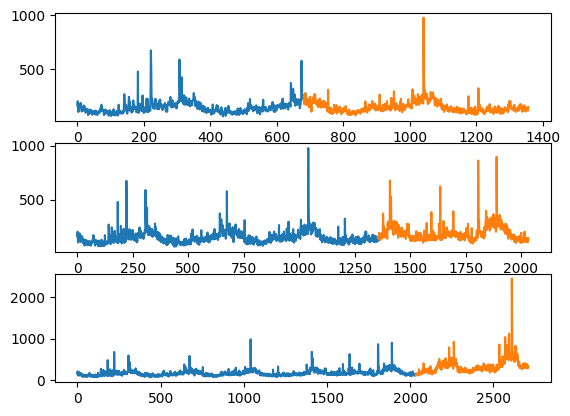

In [137]:
from sklearn.model_selection import TimeSeriesSplit

X = tsd['English'].values
splits = TimeSeriesSplit(n_splits=3)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()

In [138]:
X = tsd['English'].values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

## Persistent Forecasting Model

In [164]:
values = tsd[['English']]
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

def model_persistence(x):
    return x

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

print("---------------------------------Errors--------------------------------------")
print('Test MSE: %.3f' % mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test_y, predictions)))

                t  t+1
2015-07-01    NaN  165
2015-07-02  165.0  203
2015-07-03  203.0  131
2015-07-04  131.0  103
2015-07-05  103.0  112
---------------------------------Errors--------------------------------------
Test MSE: 10834.352
Test RMSE: 104.088


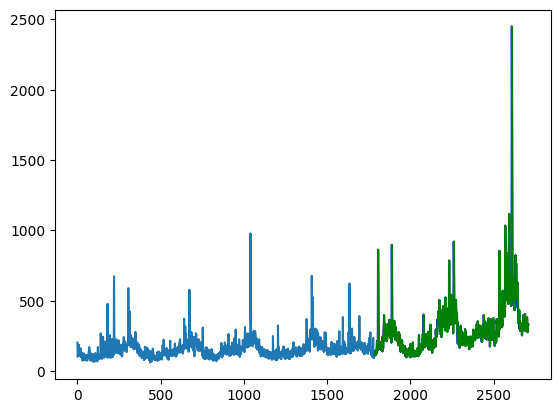

In [153]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y], color='blue')
plt.plot([None for i in train_y] + [x for x in predictions], color='green')
plt.show()

## Residual and Absolute Errors

---------------Residuals ----------------------
      0
0   3.0
1  -5.0
2  23.0
3  -3.0
4  11.0


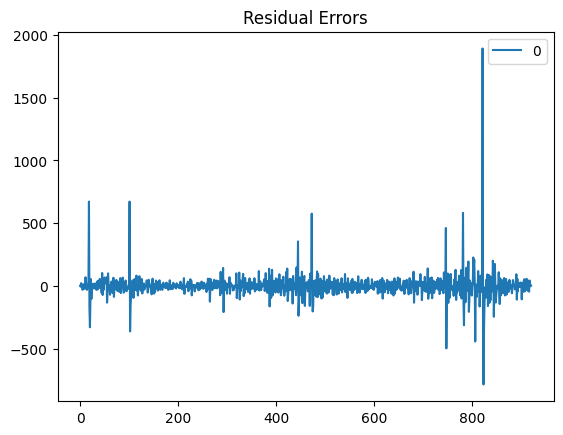

-----------Residuals Statistics----------------
                 0
count   922.000000
mean      0.235358
std     104.144422
min    -783.000000
25%     -30.000000
50%      -1.000000
75%      29.000000
max    1890.000000


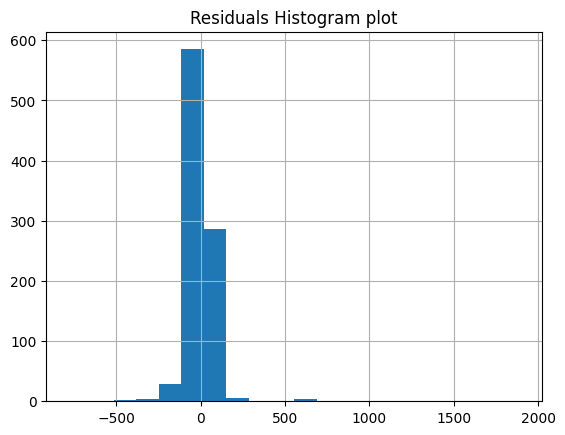

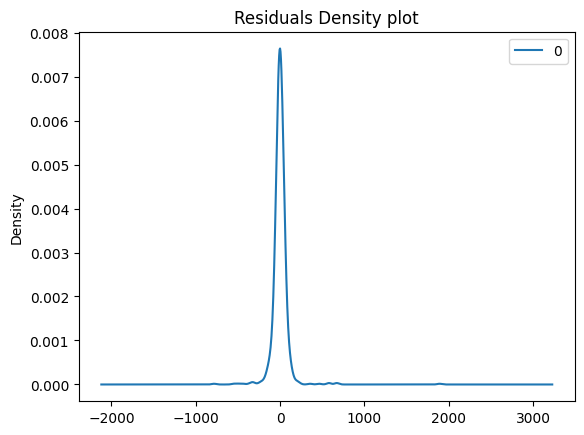

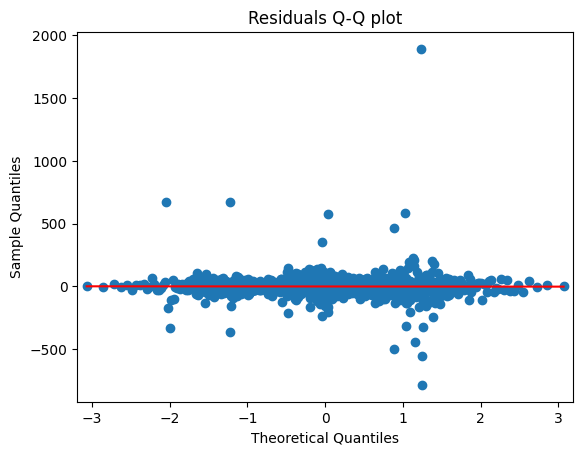

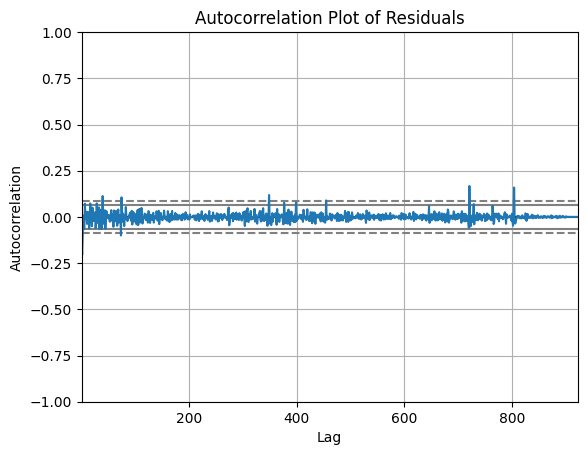

In [171]:
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print("---------------Residuals ----------------------")
print(residuals.head())

residuals.plot()
plt.title("Residual Errors")
plt.show()

print("-----------Residuals Statistics----------------")
print(residuals.describe())


residuals.hist(bins=20)
plt.title("Residuals Histogram plot")
plt.show()

residuals.plot(kind='kde')
plt.title("Residuals Density plot")
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='r')
plt.title("Residuals Q-Q plot")
plt.show()

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)
plt.title("Autocorrelation Plot of Residuals")
plt.show()

---------------Absolute Error ----------------------
      0
0   3.0
1   5.0
2  23.0
3   3.0
4  11.0


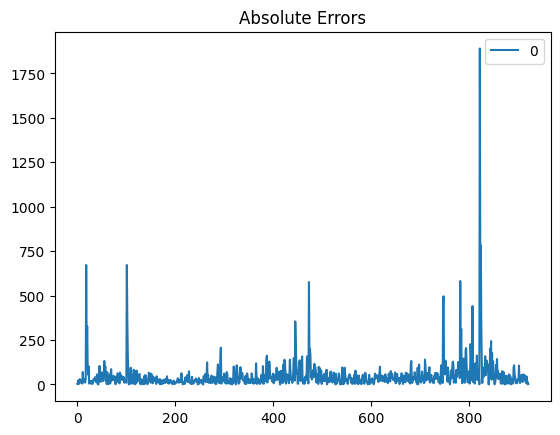

-----------Absolute Error Statistics----------------
                 0
count   922.000000
mean     48.426247
std      92.187138
min       0.000000
25%      14.000000
50%      30.000000
75%      55.750000
max    1890.000000


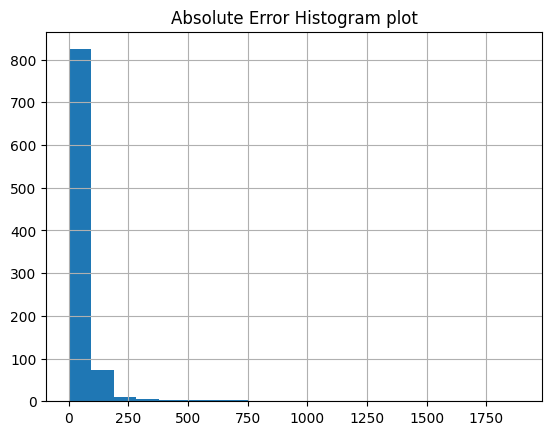

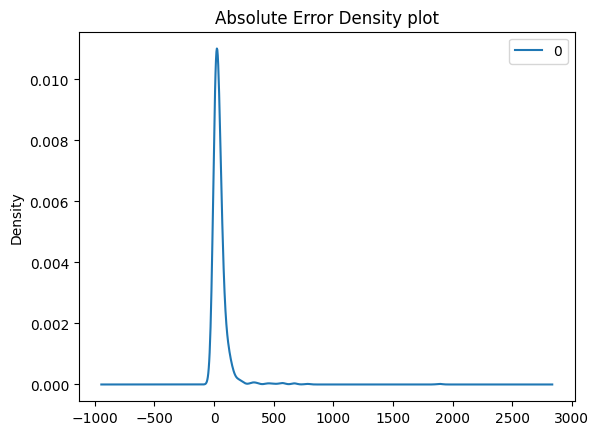

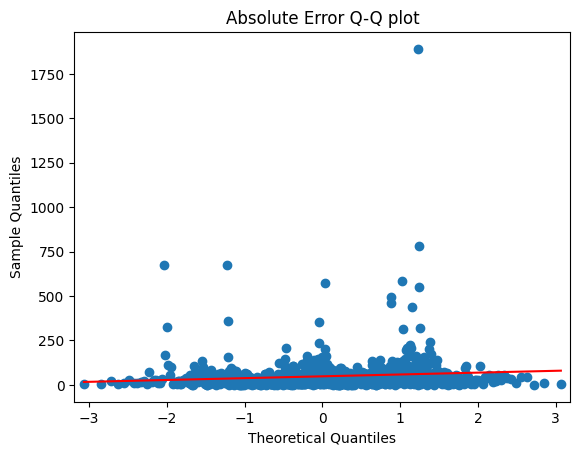

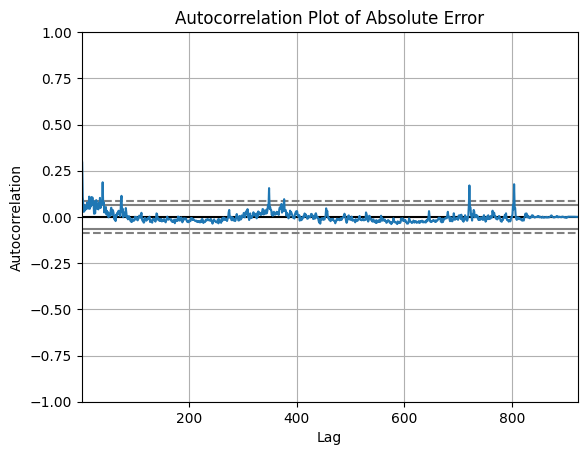

In [173]:
absolute_err = [abs(test_y[i]-predictions[i]) for i in range(len(predictions))]
absolute_err = pd.DataFrame(residuals)
print("---------------Absolute Error ----------------------")
print(absolute_err.head())

absolute_err.plot()
plt.title("Absolute Errors")
plt.show()

print("-----------Absolute Error Statistics----------------")
print(absolute_err.describe())


absolute_err.hist(bins=20)
plt.title("Absolute Error Histogram plot")
plt.show()

absolute_err.plot(kind='kde')
plt.title("Absolute Error Density plot")
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(absolute_err, line='r')
plt.title("Absolute Error Q-Q plot")
plt.show()

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(absolute_err)
plt.title("Autocorrelation Plot of Absolute Error")
plt.show()

##  Auto Regression Forecast Model

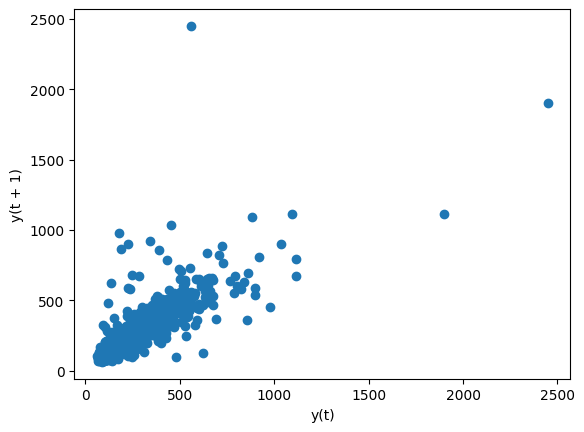

In [183]:
series = tsd['English']
pd.plotting.lag_plot(series)
plt.show()

In [185]:
values = pd.DataFrame(series.values)
for i in [1,2,7,30,365]:
    dataframe = pd.concat([values.shift(i), values], axis=1)
    dataframe.columns = ['t', 't+'+str(i)]
    result = dataframe.corr()
    print(result)

            t       t+1
t    1.000000  0.838221
t+1  0.838221  1.000000
            t       t+2
t    1.000000  0.743135
t+2  0.743135  1.000000
            t       t+7
t    1.000000  0.686556
t+7  0.686556  1.000000
             t      t+30
t     1.000000  0.607481
t+30  0.607481  1.000000
              t     t+365
t      1.000000  0.593975
t+365  0.593975  1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

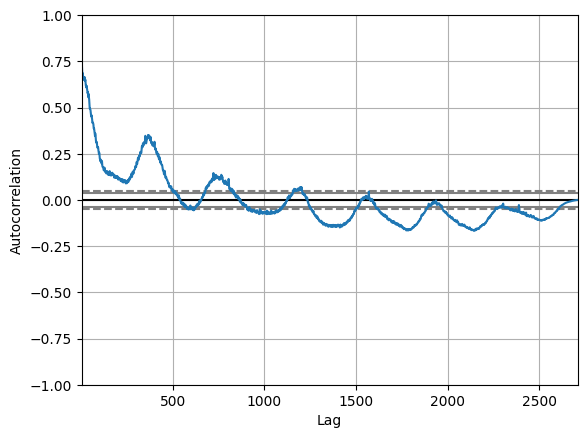

In [186]:
autocorrelation_plot(series)

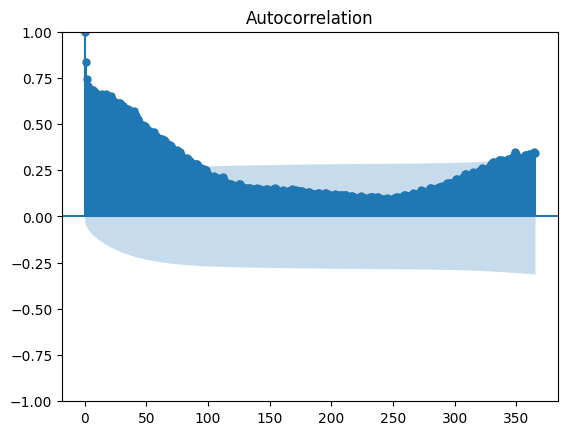

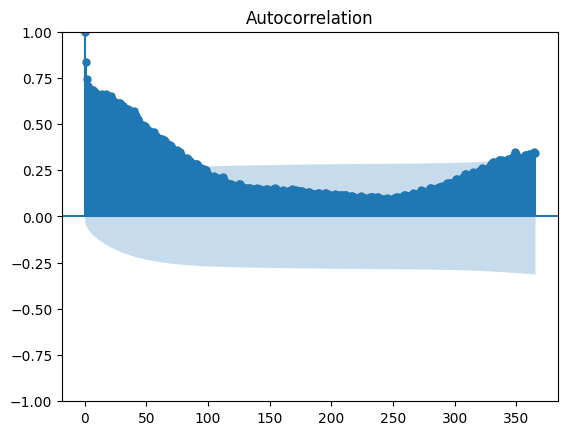

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=365)

Coefficients: [1.03757262e+02 9.88823422e-02]
predicted=113.546614, expected=92.000000
predicted=114.985017, expected=135.000000
predicted=115.127250, expected=114.000000
predicted=115.141314, expected=143.000000
predicted=115.142705, expected=125.000000
predicted=115.142842, expected=84.000000
predicted=115.142856, expected=99.000000
Test RMSE: 20.598


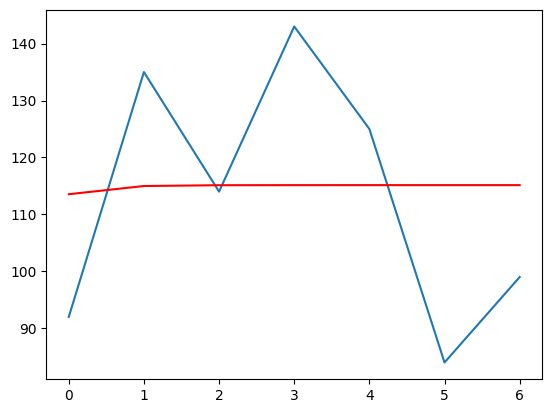

In [209]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

X=tsd['English']['Sep-2018'].values

train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Moving Average Forecasting Models


Coef=[-0.03431298 -0.54577401 -0.49227804 -0.37504343 -0.29872141 -0.23377968
 -0.16332042 -0.03407261]
predicted error=0.664491, expected error=3.000000
predicted error=11.268168, expected error=-5.000000
predicted error=10.218765, expected error=23.000000
predicted error=-11.250855, expected error=-3.000000
predicted error=-7.844169, expected error=11.000000
predicted error=-13.186992, expected error=-30.000000
predicted error=12.048979, expected error=11.000000
predicted error=4.605037, expected error=12.000000
predicted error=-0.747357, expected error=16.000000
predicted error=-18.799511, expected error=-22.000000
predicted error=-0.404255, expected error=-5.000000
predicted error=7.523979, expected error=70.000000
predicted error=-27.526148, expected error=18.000000
predicted error=-42.442491, expected error=-26.000000
predicted error=-20.958233, expected error=-30.000000
predicted error=22.387355, expected error=-12.000000
predicted error=31.034446, expected error=11.000000
predi

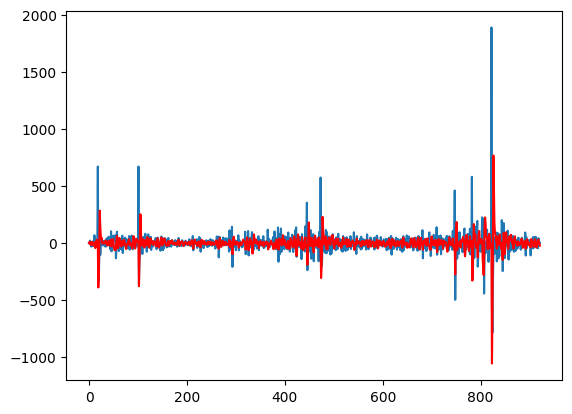

In [211]:
from statsmodels.tsa.ar_model import AutoReg

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AutoReg(train_resid, lags=7)
model_fit = model.fit()
coef = model_fit.params
print('Coef=%s' %coef)

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

Coef=[-0.03431298 -0.54577401 -0.49227804 -0.37504343 -0.29872141 -0.23377968
 -0.16332042 -0.03407261]
predicted=120.309899, expected=119.000000
predicted=120.194194, expected=114.000000
predicted=119.899572, expected=137.000000
predicted=128.599120, expected=134.000000
predicted=130.099654, expected=145.000000
predicted=136.627184, expected=115.000000
predicted=121.675066, expected=126.000000
predicted=126.838652, expected=138.000000
predicted=131.082040, expected=154.000000
predicted=141.296846, expected=132.000000
predicted=133.628893, expected=127.000000
predicted=132.892560, expected=197.000000
predicted=161.114607, expected=215.000000
predicted=173.054261, expected=189.000000
predicted=171.656529, expected=159.000000
predicted=164.693642, expected=147.000000
predicted=157.859082, expected=158.000000
predicted=161.417469, expected=191.000000
predicted=181.755671, expected=863.000000
predicted=490.065970, expected=692.000000
predicted=447.410685, expected=364.000000
predicted=365.

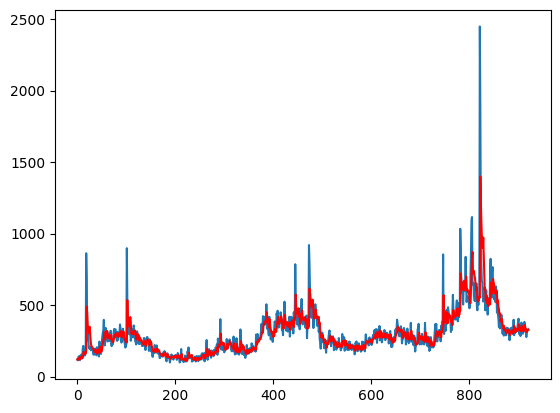

In [217]:
from statsmodels.tsa.ar_model import AutoReg

window = 7

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AutoReg(train_resid, lags=7)
model_fit = model.fit()
coef = model_fit.params
print('Coef=%s' %coef)

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)


# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

## ARIMA Forecasting

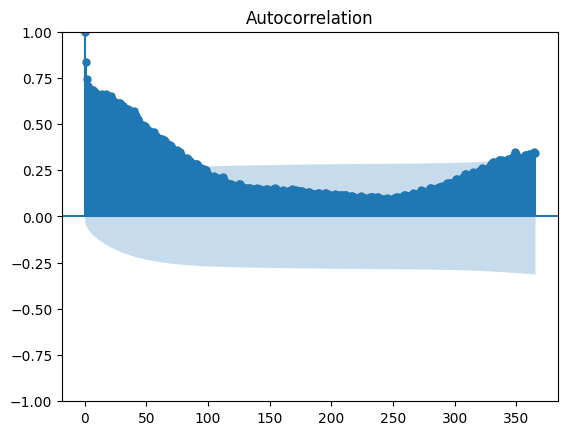

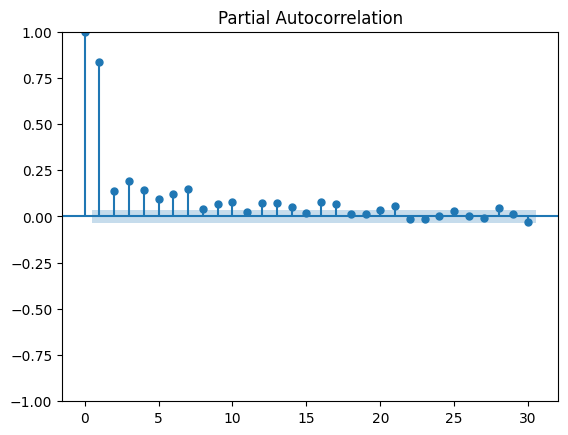

In [239]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series, lags=365)
plt.show() 

plot_pacf(series, lags=30)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                English   No. Observations:                 2711
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -15336.037
Date:                Fri, 30 Dec 2022   AIC                          30680.074
Time:                        00:54:39   BIC                          30703.693
Sample:                    07-01-2015   HQIC                         30688.614
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2969      0.009    -34.833      0.000      -0.314      -0.280
ar.L2         -0.2833      0.005    -56.146      0.000      -0.293      -0.273
ar.L3         -0.1732      0.006    -29.215      0.0

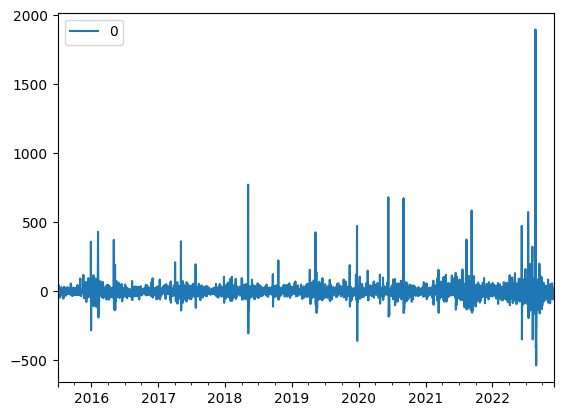

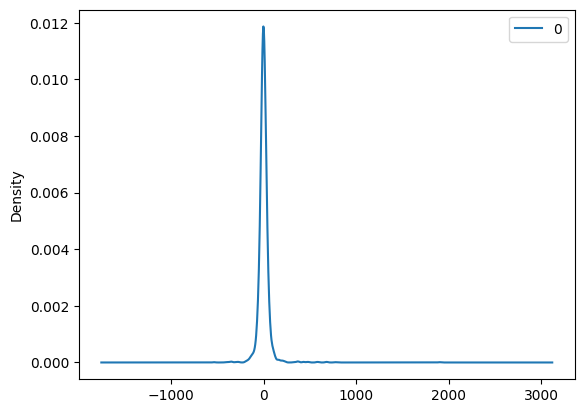

                 0
count  2711.000000
mean      0.166372
std      69.486293
min    -537.025034
25%     -22.512206
50%      -2.024426
75%      18.797314
max    1898.479628


In [240]:

from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

predicted=168.374132, expected=200.000000
predicted=195.345307, expected=222.000000
predicted=219.874799, expected=187.000000
predicted=173.860288, expected=154.000000
predicted=150.276369, expected=154.000000
predicted=176.346021, expected=153.000000
predicted=165.249184, expected=145.000000
predicted=144.999839, expected=174.000000
predicted=175.182349, expected=163.000000
predicted=162.378222, expected=163.000000
predicted=155.190931, expected=155.000000
Test RMSE: 21.626


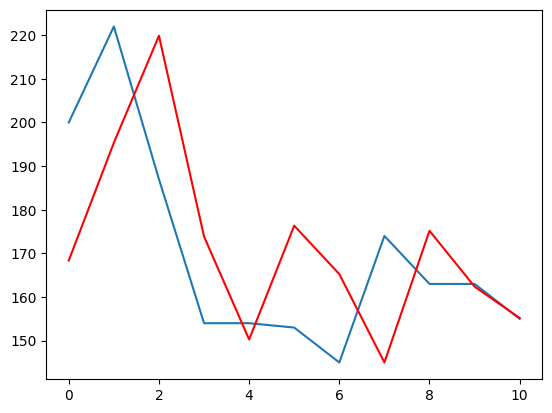

In [229]:
# split into train and test sets
X = tsd['English']['Mar-2018'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()